#Predicting high failure risk participants in American Dislocated Worker programs <a name="bt"></a>

## Video presentation: https://youtu.be/YENOTrjOdzM

**Daniel Schnelbach, Kathryn Bolton**

[Motivation](#s1)

[Key Findings](#kf)

[Data](#d1)

[Exploratory Data Analysis](#eda)

[Machine Learning: Classification](#m1)

[Results](#r1)
*   [Grid Search Optimization](#g1)
*   [Performance Visualizations](#p1)
*   [Feature Importance](#f1)

[Regression Analysis on States](#rs)

[Fairness Audit (proof of concept)](#fa)

[Value Add Research and Estimation](#vr)

#Motivation <a name="s1"></a>

From January 2017 through December 2019, 6.3 million workers were displaced from their jobs according to the [U.S. Bureau of Labor Statistics](https://www.bls.gov/news.release/disp.nr0.htm). Of course, the pandemic conditions that set in early in 2020 have likely exacerbated this. An unfortunate impact of COVID is job loss generally, but there is evidence that it is creating many [long-term unemployed](https://www.businessinsider.com/long-term-unemployed-permanent-layoffs-rising-coronavirus-2020-10), a particularly disadvantaged group. Workers who have been unemployed because of job displacement often experience persistent subsequent earnings losses, earnings volatility, and later periods of job loss. Long-term unemployment, especially, can have acute impacts beyond finances by adversely affecting the physical and mental health of the unemployed and negatively affecting their children’s schooling outcomes. The economy will likely bounce back when a vaccine is widely distributed. Yet, many businesses will have closed their doors for good, meaning many people will need to take on new and different work to regain a foothold. Furthermore, accelerating technological changes and globalization are creating waves of worker displacement in various sectors, and will continue for the foreseeable future. This makes our research especially timely. 

The Workforce Innovation and Opportunity Act (WIOA) of 2014 established a coordinated system managed by the United States Department of Labor's (DOL) Employment and Training Administration to help job seekers access employment, education, training, and support services to succeed in the labor market and to match employers with the skilled workers they need to compete in the global economy. It brings together the core programs of Federal investment in skill development: Employment and training services for adults, dislocated workers, youth and other specific vulnerable populations, and adult education and family literacy programs.

Although the effectiveness of workforce development policies is mixed,  [training and education can significantly increase the reemployment and earnings prospects](https://www.worldbank.org/en/news/feature/2020/10/20/tackling-the-impact-of-job-displacement-through-public-policies) for dislocated workers. There is great value to better understanding which programs are working for which people so program administrators can do more to ensure participant success.  

Under the WIOA, states are required to report Individual Performance Records of program participants on a quarterly and annual basis. These records include demographics, types of services received, and outcomes attained as a result of participating in a given program (including whether or not they became employed, whether or not they had measurable skill gain, and post-program wages). 
Using machine learning methods, we seek to create a screening tool for incoming participants to WIOA sponsored dislocated worker programs (administered at the state level) in order to identify those that are most at risk for failing to regain employment after the program. Given that these individuals use unemployment insurance and do not contribute tax revenue, the government has an incentive to dedicate additional resources towards their success. Beyond the fiscal perspective, our project has the potential to benefit many Americans that are hurt by unemployment and that are otherwise struggling to adapt to a rapidly evolving job market.

Our motivation, then, is to show that the right Machine Learning tools can help support and enhance government workforce development programs - specifically, their program meant to help dislocated workers. 

#Key Findings <a name="kf"></a>

The main highlights of our work are:
- Simple and interpretable models can be used to reliably identify incoming participants as likely program failures with a **precision of ~75%**. Just 25% of participants fail to attain employment, so this level of precision helps ensure administrators that they can successfully target those in need with additional support.
- **A successful participant regains ~90% of their pre-enrollment wages** while unsuccessful participants remain unemployed. There are two relevant, quantifiable costs/benefit analyses:
  - The success individual experiences a net wage gain of **\$6,700** relative to the unsuccessful. 
  - The unsuccessful must collect unemployment. We calculate the average benefit and duration will cost the state government **~\$3,300**.
  - If the unsuccessful candidate re-enrolls or continues to use WIOA program services, an additional cost of up to **\$3,600** for career and training services could be incurred. 
  - We have not quantified what the successful participant returns in tax revenue given they are employed, nor what other benefits the unemployed may receieve as these estimates will lack precision. We believe a conservative estimate, however, is that program administrators can spend up to $3,300 MORE per enrollee and still make a plausible claim to creating a net gain. This even excludes the clear benefit to the participant who stands to earn much more if they gain employment. 
- Tree-based models reveal some commonsense attributes of workers, like their pre-enrollment wages, are indicators of likely success/failure. 
- The government may be constrained and/or face legal risk when choosing to provide additional support to participants at risk of failure, so we have shown that the tool can be used to audit for group fairness. Fairness metrics are becoming increasingly well-defined and are an innovative way for program administrators to ensure equitable program delivery.  
- An **important caveat** is that we  believe that there is value and plenty of gain to be had IF the administrators could better serve at-risk participants AND change their actual trajectory from failure to success. Ours is an intermediate tool that can help unlock insights, but this is NOT to say it identifies causal connections. The tool can guide administrator's allocation decisions and provide fruitful areas for exploration and state coordination. 

## Recommendations
Following our analysis, we believe the government and the individuals it serves stand to gain from implementing a tool that can help uncover insights to improve program delivery, fairness, and coordination.

WIOA should fund a team of Machine learning professionals and current program analysts and administrators to develop an initial working pipeline that can:
- Precisely identify those at greatest risk for program failure
- Identify salient features that signal such risk
- Look across states to see if programs are more or less successful at helping inidividuals that carry such risk (e.g., Why do Iowa, Wyoming and Hawaii participants have a much higher success rate? See regression analysis)
- Audit their work for fairness across certain groups (e.g., those with significant barriers like being long-term unemployed)
- Design a field trial to test and deploy the model. The field trial shoudl be focused on both validating the model AND helping underdtand what kind of program services/interventions are most effective for changing the trajectory of at-risk participants. 

If the tool can be successfully field tested, it can be disseminated throughout the program or provided to states who may use it in their WIOA or other state-guided workforce retraining programs. 




[Back to top](#bt)
#Data <a name="d1"></a>

The U.S. Department of Labor (DOL) provides a participant data archive with all quarterly public files dating back to when the new paradigm was established in 2016. The most recent data availables is for PY 2018 Q2. This file alone is 10+GB and contains over 20 million rows of data

There is generally one record for each person for a period of participation, regardless of the number of funding streams that served the individual. Unique records are defined by three fields: the state, individual ID, and the exit date. Records with overlapping periods of participation and records with periods of participation separated by less than 90 days are combined into a single record. 

We use Dask, an open source big data Python library integrated with familiar data libraries, to perform this initial filtering. We decided to focus specifically on **dislocated workers**, and carefully reviewed all the variables in the dataset to determine which would potentially be relevant to that population and our project questions. We documented those variables in a [spreadsheet](https://docs.google.com/spreadsheets/d/1j0NCmd4xH6QQjrZnaWgPUyO3IyNmgGfFxbefSv1-MLo/edit?usp=sharing). We further filtered out columns that had >95% missingness, and ended up with a much more manageable set of observations and features.

The basic cleaned dataset can be summarized for our **classification** task as follows:

- Rows: 
  - Each row is an individual (program participant) that has been served by the WIOA program due to their status as a Dislocated Worker.
  - Total observations: 459,034
- Columns:
  - Each column is a feature of the individual (e.g., gender, veteran status, served by social program prior to entry...)
  - Total features: 54
- Outcome:
  - Our outcome label is **"Employed in 2nd Quarter after program exit"**
  - This is a binary label (employed, or not employed). We use this as a measure of our success. 
- Task:
  - We are interested in identifying participants that are **unlikely** to be employed by the 2nd quarter after exit. 
  - By identifying these individuals as they enter the program, program administrators may be able to choose different interventions and trainings, or simply provide more time and check-ins to help ensure such participants have a better chance at success.  

- Performance
  - Baseline: 0.271 
    - 27.1% of program participants are **NOT employed** in the 2nd quarter after exit.
  - This is the baseline measure our model ought to improve on at the very least. 

- Metrics:
  - We noted in our proposal that we expect not all individuals will be able to receive extra attention by program administrators due to resource constraints. We will explore **precision** as a main metric, but can also consider slightly more involved metrics such as **precision at the top 10%** where the percentage we focus on is based on an assumption that administrators will only be able to help so many individuals identified as "at-risk". 
  - Since we have relevant demographic and socioeconomic data, we can also consider **fairness** metrics, ensuring things like **recall parity** for demographics we are interested in. An example might be **age** since one could imagine older individuals have a harder time transitioning and may be underserved.  

## Missing Data
Fortunately, this data is well managed and the documentation explains the presence of missing values: 

_"The data items available for an individual depend on the funding streams that provided services to the individual. When items are not available for an individual, the data in the field is blank. Blanks should not be treated as zero or ‘no’."_

Since missing values are meaningful, we created missingness indicators for each of our feature columns so that any necessary imputation to run a particular model will not result in losing this information.

There is an exception to this rule for a group of features that are coded such that a start date is present if the individual received that training/service, and left blank if they did not participate. For those featurues, we recode to a binary variable for received/didn't receive to make them straightforwardly usable in our modelling. 

## Data recoding
The methods we utilize work best with exclusively numerical data. Therefore, we further transform all non-binary categorical variables using one hot encoding. The few numerical features we include as features are left as is.

# Big data initial filtering

Do not rerun unless using original WIOA data and familiar with Dask - skip to [Machine Learning](#m1) to begin using our provided WIOA_clean_v2 data. 

In [ ]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import dask.array as da
from dask.diagnostics import ProgressBar
import dask

In [ ]:
from dask.distributed import Client

client = Client()

In [ ]:
# You'll see a box showing how a cluster has been made on your machine locally
client

Client Scheduler: tcp://127.0.0.1:61559 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 16.91 GB


In [ ]:
# Dates not all parsing correctly, leave outside of dtype specification for now
'''parse_dates=[10,30,32,73,74,78,98,106,107,108,109,
              110,111,112,113,114,115,116,117,118,119,
              120,121,122,123,124,125,126,127,130,131,
              132,133,134,136,137,138,140,141,142,143,
              144,145,146,147,148,149,152,158,159,163,
              164,168,174,175,176,177,178,179,180,181,
              182,183,184,185,186,187,189,190,217,219,
              221,222,223,224,225,226,227,229,230,234,237,
              241,244,248,254,259
                ]'''

## Read raw file into a Dask DataFrame

In [ ]:
df = dd.read_csv('WIOAPerformanceRecords_PY2018Q2_PUBLIC.csv',
                 dtype={'PIRL100':'object',
                        'PIRL200':'float32',
                        'PIRL304':'float32',
                        'PIRL306':'float32',
                        'PIRL900':'float32',
                        'PIRL901':'float32',
                        'PIRL906':'float32',
                        'PIRL933':'float32',
                        'PIRL1000':'float32',
                        'PIRL1001':'float32',
                        'PIRL1002':'float32',
                        'PIRL1003':'float32',
                        'PIRL1004':'float32',
                        'PIRL1005':'float32',
                        'PIRL1006':'float32',
                        'PIRL1007':'float32',
                        'PIRL1100':'float32',
                        'PIRL1101':'float32',
                        'PIRL1102':'float32',
                        'PIRL1103':'float32',
                        'PIRL1104':'float32',
                        'PIRL1105':'float32',
                        'PIRL1106':'float32',
                        'PIRL1107':'float32',
                        'PIRL1108':'float32',
                        'PIRL1109':'float32',
                        'PIRL1110':'float32',
                        'PIRL1111':'float32',
                        'PIRL1112':'float32',
                        'PIRL1113':'float32',
                        'PIRL1116':'float32',
                        'PIRL1200':'float32',
                        'PIRL1201':'float32',
                        'PIRL1202':'float32',
                        'PIRL1203':'float32',
                        'PIRL1206':'float32',
                        'PIRL1207':'float32',
                        'PIRL1210':'float32',
                        'PIRL1213':'float32',
                        'PIRL1214':'float32',
                        'PIRL1215':'float32',
                        'PIRL1216':'float32',
                        'PIRL1217':'float32',
                        'PIRL1218':'float32',
                        'PIRL1219':'float32',
                        'PIRL1220':'float32',
                        'PIRL1221':'float32',
                        'PIRL1222':'float32',
                        'PIRL1302':'float32',
                        'PIRL1308':'float32',
                        'PIRL1309':'float32',
                        'PIRL1313':'float32',
                        'PIRL1314':'float32',
                        'PIRL1318':'float32',
                        'PIRL1402':'float32',
                        'PIRL1403':'float32',
                        'PIRL1405':'float32',
                        'PIRL1406':'float32',
                        'PIRL1407':'float32',
                        'PIRL1408':'float32',
                        'PIRL1409':'float32',
                        'PIRL1410':'float32',
                        'PIRL1411':'float32',
                        'PIRL1412':'float32',
                        'PIRL1413':'float32',
                        'PIRL1414':'float32',
                        'PIRL1415':'float32',
                        'PIRL1416':'float32',
                        'PIRL1501':'float32',
                        'PIRL1503':'float32',
                        'PIRL1801':'float32',
                        'PIRL1803':'float32',
                        'PIRL1805':'float32',
                        'PIRL1806':'float32',
                        'PIRL1807':'float32',
                        'PIRL1808':'float32',
                        'PIRL1809':'float32',
                        'PIRL1810':'float32',
                        'PIRL1811':'float32',
                        'PIRL1813':'float32',
                        'PIRL1814':'float32',
                        'PIRL1903':'float32',
                        'PIRL1906':'float32',
                        'PIRL1910':'float32',
                        'PIRL1913':'float32',
                        'PIRL1917':'float32',
                        'PIRL2001':'float32',
                        'PIRL2414':'float32',
                        'PIRL101':'object',
                        'PIRL102':'object',
                        'PIRL103':'object',
                        'PIRL105':'object',
                        'PIRL106':'object',
                        'PIRL107':'object',
                        'PIRL108-A':'float32',
                        'PIRL108-B':'float32',
                        'PIRL108-C':'float32',
                        'PIRL201':'float32',
                        'PIRL202':'float32',
                        'PIRL203':'float32',
                        'PIRL204':'float32',
                        'PIRL205':'float32',
                        'PIRL206':'float32',
                        'PIRL207':'float32',
                        'PIRL208':'float32',
                        'PIRL209':'float32',
                        'PIRL210':'float32',
                        'PIRL211':'float32',
                        'PIRL212':'float32',
                        'PIRL213':'float32',
                        'PIRL214':'float32',
                        'PIRL215':'float32',
                        'PIRL300':'float32',
                        'PIRL301':'float32',
                        'PIRL302':'float32',
                        'PIRL303':'float32',
                        'PIRL305':'float32',
                        'PIRL307':'float32',
                        'PIRL308':'float32',
                        'PIRL309':'float32',
                        'PIRL310':'float32',
                        'PIRL311':'float32',
                        'PIRL312':'float32',
                        'PIRL313':'float32',
                        'PIRL314':'float32',
                        'PIRL315':'float32',
                        'PIRL316':'float32',
                        'PIRL400':'float32',
                        'PIRL401':'float32',
                        'PIRL402':'float32',
                        'PIRL403':'float32',
                        'PIRL404':'float32',
                        'PIRL405':'float32',
                        'PIRL406':'float32',
                        'PIRL407':'float32',
                        'PIRL408':'float32',
                        'PIRL409':'float32',
                        'PIRL410':'float32',
                        'PIRL412':'float32',
                        'PIRL413':'float32',
                        'PIRL600':'float32',
                        'PIRL601':'float32',
                        'PIRL602':'float32',
                        'PIRL603':'float32',
                        'PIRL604':'float32',
                        'PIRL701':'float32',
                        'PIRL702':'float32',
                        'PIRL704':'float32',
                        'PIRL800':'float32',
                        'PIRL801':'float32',
                        'PIRL802':'float32',
                        'PIRL803':'float32',
                        'PIRL804':'float32',
                        'PIRL805':'float32',
                        'PIRL806':'float32',
                        'PIRL807':'float32',
                        'PIRL808':'float32',
                        'PIRL903':'float32',
                        'PIRL904':'float32',
                        'PIRL905':'float32',
                        'PIRL907':'float32',
                        'PIRL908':'float32',
                        'PIRL909':'float32',
                        'PIRL910':'float32',
                        'PIRL911':'float32',
                        'PIRL912':'object',
                        'PIRL913':'float32',
                        'PIRL914':'float32',
                        'PIRL916':'float32',
                        'PIRL917':'float32',
                        'PIRL918':'float32',
                        'PIRL919':'object',
                        'PIRL920':'object',
                        'PIRL921':'float32',
                        'PIRL922':'float32',
                        'PIRL923':'float32',
                        'PIRL930':'float32',
                        'PIRL931':'float32',
                        'PIRL932':'float32',
                        'PIRL934':'object',
                        'PIRL935':'float32',
                        'PIRL936':'object',
                        'PIRL937':'object',
                        'PIRL938':'object',
                        'PIRL939':'float32',
                        'PIRL940':'float32',
                        'PIRL1114':'float32',
                        'PIRL1115':'float32',
                        'PIRL1205':'float32',
                        'PIRL1211':'float32',
                        'PIRL1300':'float32',
                        'PIRL1301':'object',
                        'PIRL1303':'float32',
                        'PIRL1304':'float32',
                        'PIRL1305':'object',
                        'PIRL1306':'object',
                        'PIRL1307':'float32',
                        'PIRL1310':'float32',
                        'PIRL1311':'object',
                        'PIRL1312':'float32',
                        'PIRL1315':'float32',
                        'PIRL1316':'object',
                        'PIRL1317':'float32',
                        'PIRL1319':'float32',
                        'PIRL1320':'float32',
                        'PIRL1332':'float32',
                        'PIRL1333':'float32',
                        'PIRL1401':'float32',
                        'PIRL1500':'float32',
                        'PIRL1600':'float32',
                        'PIRL1601':'float32',
                        'PIRL1602':'float32',
                        'PIRL1603':'float32',
                        'PIRL1604':'float32',
                        'PIRL1605':'float32',
                        'PIRL1606':'float32',
                        'PIRL1607':'float32',
                        'PIRL1608':'float32',
                        'PIRL1610':'object',
                        'PIRL1611':'float32',
                        'PIRL1612':'object',
                        'PIRL1613':'object',
                        'PIRL1614':'object',
                        'PIRL1615':'object',
                        'PIRL1616':'object',
                        'PIRL1617':'object',
                        'PIRL1618':'float32',
                        'PIRL1700':'float64',
                        'PIRL1701':'float64',
                        'PIRL1702':'float64',
                        'PIRL1703':'float64',
                        'PIRL1704':'float64',
                        'PIRL1705':'float64',
                        'PIRL1706':'float64',
                        'PIRL1800':'float32',
                        'PIRL1802':'float32',
                        'PIRL1804':'float32',
                        'PIRL1812':'float32',
                        'PIRL1900':'float32',
                        'PIRL1901':'float32',
                        'PIRL1902':'float32',
                        'PIRL1904':'float32',
                        'PIRL1905':'float32',
                        'PIRL1907':'float32',
                        'PIRL1908':'float32',
                        'PIRL1909':'float32',
                        'PIRL1911':'float32',
                        'PIRL1912':'float32',
                        'PIRL1914':'float32',
                        'PIRL1915':'float32',
                        'PIRL1916':'float32',
                        'PIRL1918':'float32',
                        'PIRL1919':'float32',
                        'PIRL1920':'float32',
                        'PIRL1921':'float32',
                        'PIRL1922':'float32',
                        'PIRL2002':'float32',
                        'PIRL2003':'object',
                        'PIRL2004':'float32',
                        'PIRL2413':'float32',
                        'PIRL2700':'object',
                        'PIRL2701':'object',
                        'PIRL2702':'object',
                        'PIRL 3000':'object',
                        'PIRL 3001':'float32',
                        'PIRL 3002':'float32',
                        'PIRL 3003':'float32',
                        'PIRL 3004':'float32',
                        'PIRL 3005':'float32',
                        'PIRL 3006':'float32',
                        'PIRL 3007':'float32',
                        'PIRL 3008':'float32',
                        'PIRL 3009':'float32',
                        'PIRL 3010':'float32',
                        'PIRL 3011':'float32',
                        'PIRL 3012':'float32',
                        'PIRL 3013':'float32',
                        'PIRL 3014':'float32',
                        'PIRL 3015':'float32',
                        'PIRL 3016':'float32',
                        'PIRL 3017':'float32',
                        'PIRL 3018':'float32',
                        'PIRL 3019':'float32',
                        'PIRL 3020':'float32',
                        'PIRL 3021':'float32',
                        'PIRL 3022':'float64',
                        'PIRL 3023':'float32',
                        'PIRL 3024':'float32',
                        'PIRL 3025':'float32',
                        'PIRL 3026':'float32',
                        'PIRL 3027':'float32',
                        'PIRL 3028':'float32',
                        'PIRL 3029':'float32',
                        'PIRL 3030':'float32',
                        'PIRL 3031':'float32',
                        'PIRL 3032':'float32',
                        'PIRL 3033':'float32',
                        'PIRL 3034':'float32',
                        'PIRL 3035':'float32',
                        'PIRL 3036':'float32',
                        'PIRL 3037':'float32',
                        'PIRL 3038':'float32',
                        'PIRL 3039':'float32',
                        'PIRL 3040':'float32',
                        'PIRL 3041':'float32',
                        'PIRL 3042':'object',
                        'PIRL 3043':'object',
                        'PIRL 3044':'object',
                        'PIRL 3045':'object',
                        'PIRL 3046':'object',
                        'PIRL 3047':'object',
                        'PIRL 3048':'object',
                        'PIRL 3049':'object',
                        'PIRL 3050':'object',
                        'PIRL 3051':'object',
                        'PIRL 3052':'object',
                        'PIRL 3053':'object',
                        'PIRL 3054':'object',
                        'PIRL 3055':'object',
                        'PIRL 3056':'float32',
                        'PIRL 3057':'float32',
                        'PIRL 3058':'float32'
                        })

In [ ]:
df.head(50).to_csv('WIOA_sample.csv')

In [ ]:
# Mask to maintain only participants with Dislocated Worker (WIOA) status
mask = (df['PIRL904'] != 0) & (~df['PIRL904'].isna())

In [ ]:
dwg = df[mask]

In [ ]:
dwg

### Write the dataframe that keeps ONLY those showing participation in Dislocated Worker Grant program (DWG)

In [ ]:
dwg.to_csv('WIOA_dwg.csv')

## Read in new file

### Read in all of the partitions as a Dask Dataframe

In [ ]:
ddf = dd.read_csv('WIOA_dwg.csv/*.part',
                 dtype={'PIRL100':'object',
                        'PIRL200':'float32',
                        'PIRL304':'float32',
                        'PIRL306':'float32',
                        'PIRL900':'float32',
                        'PIRL901':'float32',
                        'PIRL906':'float32',
                        'PIRL933':'float32',
                        'PIRL1000':'float32',
                        'PIRL1001':'float32',
                        'PIRL1002':'float32',
                        'PIRL1003':'float32',
                        'PIRL1004':'float32',
                        'PIRL1005':'float32',
                        'PIRL1006':'float32',
                        'PIRL1007':'float32',
                        'PIRL1100':'float32',
                        'PIRL1101':'float32',
                        'PIRL1102':'float32',
                        'PIRL1103':'float32',
                        'PIRL1104':'float32',
                        'PIRL1105':'float32',
                        'PIRL1106':'float32',
                        'PIRL1107':'float32',
                        'PIRL1108':'float32',
                        'PIRL1109':'float32',
                        'PIRL1110':'float32',
                        'PIRL1111':'float32',
                        'PIRL1112':'float32',
                        'PIRL1113':'float32',
                        'PIRL1116':'float32',
                        'PIRL1200':'float32',
                        'PIRL1201':'float32',
                        'PIRL1202':'float32',
                        'PIRL1203':'float32',
                        'PIRL1206':'float32',
                        'PIRL1207':'float32',
                        'PIRL1210':'float32',
                        'PIRL1213':'float32',
                        'PIRL1214':'float32',
                        'PIRL1215':'float32',
                        'PIRL1216':'float32',
                        'PIRL1217':'float32',
                        'PIRL1218':'float32',
                        'PIRL1219':'float32',
                        'PIRL1220':'float32',
                        'PIRL1221':'float32',
                        'PIRL1222':'float32',
                        'PIRL1302':'float32',
                        'PIRL1308':'float32',
                        'PIRL1309':'float32',
                        'PIRL1313':'float32',
                        'PIRL1314':'float32',
                        'PIRL1318':'float32',
                        'PIRL1402':'float32',
                        'PIRL1403':'float32',
                        'PIRL1405':'float32',
                        'PIRL1406':'float32',
                        'PIRL1407':'float32',
                        'PIRL1408':'float32',
                        'PIRL1409':'float32',
                        'PIRL1410':'float32',
                        'PIRL1411':'float32',
                        'PIRL1412':'float32',
                        'PIRL1413':'float32',
                        'PIRL1414':'float32',
                        'PIRL1415':'float32',
                        'PIRL1416':'float32',
                        'PIRL1501':'float32',
                        'PIRL1503':'float32',
                        'PIRL1801':'float32',
                        'PIRL1803':'float32',
                        'PIRL1805':'float32',
                        'PIRL1806':'float32',
                        'PIRL1807':'float32',
                        'PIRL1808':'float32',
                        'PIRL1809':'float32',
                        'PIRL1810':'float32',
                        'PIRL1811':'float32',
                        'PIRL1813':'float32',
                        'PIRL1814':'float32',
                        'PIRL1903':'float32',
                        'PIRL1906':'float32',
                        'PIRL1910':'float32',
                        'PIRL1913':'float32',
                        'PIRL1917':'float32',
                        'PIRL2001':'float32',
                        'PIRL2414':'float32',
                        'PIRL101':'object',
                        'PIRL102':'object',
                        'PIRL103':'object',
                        'PIRL105':'object',
                        'PIRL106':'object',
                        'PIRL107':'object',
                        'PIRL108-A':'float32',
                        'PIRL108-B':'float32',
                        'PIRL108-C':'float32',
                        'PIRL201':'float32',
                        'PIRL202':'float32',
                        'PIRL203':'float32',
                        'PIRL204':'float32',
                        'PIRL205':'float32',
                        'PIRL206':'float32',
                        'PIRL207':'float32',
                        'PIRL208':'float32',
                        'PIRL209':'float32',
                        'PIRL210':'float32',
                        'PIRL211':'float32',
                        'PIRL212':'float32',
                        'PIRL213':'float32',
                        'PIRL214':'float32',
                        'PIRL215':'float32',
                        'PIRL300':'float32',
                        'PIRL301':'float32',
                        'PIRL302':'float32',
                        'PIRL303':'float32',
                        'PIRL305':'float32',
                        'PIRL307':'float32',
                        'PIRL308':'float32',
                        'PIRL309':'float32',
                        'PIRL310':'float32',
                        'PIRL311':'float32',
                        'PIRL312':'float32',
                        'PIRL313':'float32',
                        'PIRL314':'float32',
                        'PIRL315':'float32',
                        'PIRL316':'float32',
                        'PIRL400':'float32',
                        'PIRL401':'float32',
                        'PIRL402':'float32',
                        'PIRL403':'float32',
                        'PIRL404':'float32',
                        'PIRL405':'float32',
                        'PIRL406':'float32',
                        'PIRL407':'float32',
                        'PIRL408':'float32',
                        'PIRL409':'float32',
                        'PIRL410':'float32',
                        'PIRL412':'float32',
                        'PIRL413':'float32',
                        'PIRL600':'float32',
                        'PIRL601':'float32',
                        'PIRL602':'float32',
                        'PIRL603':'float32',
                        'PIRL604':'float32',
                        'PIRL701':'float32',
                        'PIRL702':'float32',
                        'PIRL704':'float32',
                        'PIRL800':'float32',
                        'PIRL801':'float32',
                        'PIRL802':'float32',
                        'PIRL803':'float32',
                        'PIRL804':'float32',
                        'PIRL805':'float32',
                        'PIRL806':'float32',
                        'PIRL807':'float32',
                        'PIRL808':'float32',
                        'PIRL903':'float32',
                        'PIRL904':'float32',
                        'PIRL905':'float32',
                        'PIRL907':'float32',
                        'PIRL908':'float32',
                        'PIRL909':'float32',
                        'PIRL910':'float32',
                        'PIRL911':'float32',
                        'PIRL912':'object',
                        'PIRL913':'float32',
                        'PIRL914':'float32',
                        'PIRL916':'float32',
                        'PIRL917':'float32',
                        'PIRL918':'float32',
                        'PIRL919':'object',
                        'PIRL920':'object',
                        'PIRL921':'float32',
                        'PIRL922':'float32',
                        'PIRL923':'float32',
                        'PIRL930':'float32',
                        'PIRL931':'float32',
                        'PIRL932':'float32',
                        'PIRL934':'object',
                        'PIRL935':'float32',
                        'PIRL936':'object',
                        'PIRL937':'object',
                        'PIRL938':'object',
                        'PIRL939':'float32',
                        'PIRL940':'float32',
                        'PIRL1114':'float32',
                        'PIRL1115':'float32',
                        'PIRL1205':'float32',
                        'PIRL1211':'float32',
                        'PIRL1300':'float32',
                        'PIRL1301':'object',
                        'PIRL1303':'float32',
                        'PIRL1304':'float32',
                        'PIRL1305':'object',
                        'PIRL1306':'object',
                        'PIRL1307':'float32',
                        'PIRL1310':'float32',
                        'PIRL1311':'object',
                        'PIRL1312':'float32',
                        'PIRL1315':'float32',
                        'PIRL1316':'object',
                        'PIRL1317':'float32',
                        'PIRL1319':'float32',
                        'PIRL1320':'float32',
                        'PIRL1332':'float32',
                        'PIRL1333':'float32',
                        'PIRL1401':'float32',
                        'PIRL1500':'float32',
                        'PIRL1600':'float32',
                        'PIRL1601':'float32',
                        'PIRL1602':'float32',
                        'PIRL1603':'float32',
                        'PIRL1604':'float32',
                        'PIRL1605':'float32',
                        'PIRL1606':'float32',
                        'PIRL1607':'float32',
                        'PIRL1608':'float32',
                        'PIRL1610':'object',
                        'PIRL1611':'float32',
                        'PIRL1612':'object',
                        'PIRL1613':'object',
                        'PIRL1614':'object',
                        'PIRL1615':'object',
                        'PIRL1616':'object',
                        'PIRL1617':'object',
                        'PIRL1618':'float32',
                        'PIRL1700':'float64',
                        'PIRL1701':'float64',
                        'PIRL1702':'float64',
                        'PIRL1703':'float64',
                        'PIRL1704':'float64',
                        'PIRL1705':'float64',
                        'PIRL1706':'float64',
                        'PIRL1800':'float32',
                        'PIRL1802':'float32',
                        'PIRL1804':'float32',
                        'PIRL1812':'float32',
                        'PIRL1900':'float32',
                        'PIRL1901':'float32',
                        'PIRL1902':'float32',
                        'PIRL1904':'float32',
                        'PIRL1905':'float32',
                        'PIRL1907':'float32',
                        'PIRL1908':'float32',
                        'PIRL1909':'float32',
                        'PIRL1911':'float32',
                        'PIRL1912':'float32',
                        'PIRL1914':'float32',
                        'PIRL1915':'float32',
                        'PIRL1916':'float32',
                        'PIRL1918':'float32',
                        'PIRL1919':'float32',
                        'PIRL1920':'float32',
                        'PIRL1921':'float32',
                        'PIRL1922':'float32',
                        'PIRL2002':'float32',
                        'PIRL2003':'object',
                        'PIRL2004':'float32',
                        'PIRL2413':'float32',
                        'PIRL2700':'object',
                        'PIRL2701':'object',
                        'PIRL2702':'object',
                        'PIRL 3000':'object',
                        'PIRL 3001':'float32',
                        'PIRL 3002':'float32',
                        'PIRL 3003':'float32',
                        'PIRL 3004':'float32',
                        'PIRL 3005':'float32',
                        'PIRL 3006':'float32',
                        'PIRL 3007':'float32',
                        'PIRL 3008':'float32',
                        'PIRL 3009':'float32',
                        'PIRL 3010':'float32',
                        'PIRL 3011':'float32',
                        'PIRL 3012':'float32',
                        'PIRL 3013':'float32',
                        'PIRL 3014':'float32',
                        'PIRL 3015':'float32',
                        'PIRL 3016':'float32',
                        'PIRL 3017':'float32',
                        'PIRL 3018':'float32',
                        'PIRL 3019':'float32',
                        'PIRL 3020':'float32',
                        'PIRL 3021':'float32',
                        'PIRL 3022':'float64',
                        'PIRL 3023':'float32',
                        'PIRL 3024':'float32',
                        'PIRL 3025':'float32',
                        'PIRL 3026':'float32',
                        'PIRL 3027':'float32',
                        'PIRL 3028':'float32',
                        'PIRL 3029':'float32',
                        'PIRL 3030':'float32',
                        'PIRL 3031':'float32',
                        'PIRL 3032':'float32',
                        'PIRL 3033':'float32',
                        'PIRL 3034':'float32',
                        'PIRL 3035':'float32',
                        'PIRL 3036':'float32',
                        'PIRL 3037':'float32',
                        'PIRL 3038':'float32',
                        'PIRL 3039':'float32',
                        'PIRL 3040':'float32',
                        'PIRL 3041':'float32',
                        'PIRL 3042':'object',
                        'PIRL 3043':'object',
                        'PIRL 3044':'object',
                        'PIRL 3045':'object',
                        'PIRL 3046':'object',
                        'PIRL 3047':'object',
                        'PIRL 3048':'object',
                        'PIRL 3049':'object',
                        'PIRL 3050':'object',
                        'PIRL 3051':'object',
                        'PIRL 3052':'object',
                        'PIRL 3053':'object',
                        'PIRL 3054':'object',
                        'PIRL 3055':'object',
                        'PIRL 3056':'float32',
                        'PIRL 3057':'float32',
                        'PIRL 3058':'float32'
                        })

In [ ]:
ddf.head()

,Unnamed: 0,PIRL100,PIRL101,PIRL102,PIRL103,PIRL105,PIRL106,PIRL107,PIRL108-A,PIRL108-B,...,PIRL 3049,PIRL 3050,PIRL 3051,PIRL 3052,PIRL 3053,PIRL 3054,PIRL 3055,PIRL 3056,PIRL 3057,PIRL 3058
0,12,00090df455fA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32,000Sce55bSD5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74,004b4e5fa0A9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,126,0095b50cAUad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,139,009LLcbb9fef,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(ddf)

1456309

In [ ]:
missing = ddf.isnull().sum()

In [ ]:
percent_missing = ((missing / ddf.index.size) * 100).compute()
percent_missing

Unnamed: 0      0.000000
PIRL100         0.000000
PIRL101       100.000000
PIRL102       100.000000
PIRL103       100.000000
                 ...    
PIRL 3054      97.299474
PIRL 3055      98.120042
PIRL 3056      28.392257
PIRL 3057      28.389785
PIRL 3058      28.389785
Length: 323, dtype: float64

In [ ]:
percent_missing[percent_missing > 95]

PIRL101      100.000000
PIRL102      100.000000
PIRL103      100.000000
PIRL105       99.281883
PIRL106       99.973220
                ...    
PIRL 3051     99.266433
PIRL 3052     99.821810
PIRL 3053     96.175743
PIRL 3054     97.299474
PIRL 3055     98.120042
Length: 152, dtype: float64

<AxesSubplot:>

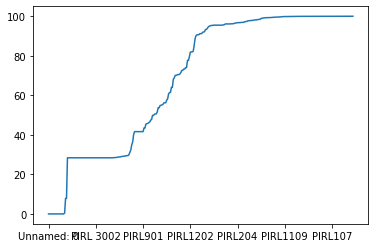

In [ ]:
percent_missing.sort_values().plot()

## Look at missingness across some important variables (mostly outcomes)

In [ ]:
# 1300 is "Received training"
percent_missing.loc['PIRL1300']

28.389785409552502

In [ ]:
# Employed in 1st Quarter After Exit Quarter (WIOA)
percent_missing.loc['PIRL1600']

41.628047344347934

In [ ]:
# Employed in 4th Quarter After Exit Quarter (WIOA)
percent_missing.loc['PIRL1606']

41.628047344347934

In [ ]:
# Wages 3rd Quarter Prior to Participation Quarter
percent_missing.loc['PIRL1700']

43.46090012490481

In [ ]:
# Wages 3rd Quarter after exit quarter
percent_missing.loc['PIRL1705']

68.12036456548714

In [ ]:
# WIOA Measurable skill gains
percent_missing.loc['PIRL 3007']

96.10810617801579

In [ ]:
# Served by a dislocated worker funding stream
percent_missing.loc['PIRL 3002']

28.389785409552502

In [ ]:
# WIOA Measurable skill gains
percent_missing.loc['PIRL 3017']

74.00462401866636

## Narrow to only those we can see binary outcome on Employment after exit

In [ ]:
mask = (~ddf['PIRL1602'].isna())
mask2 = (ddf['PIRL1602']!=9)

In [ ]:
df = ddf[mask & mask2]

In [ ]:
df = df.compute()

In [ ]:
len(df)

562788

In [ ]:
# Drop the index column I forgot to exclude in first read/write
df = df.iloc[:,1:]
df.head()

,PIRL100,PIRL101,PIRL102,PIRL103,PIRL105,PIRL106,PIRL107,PIRL108-A,PIRL108-B,PIRL108-C,...,PIRL 3049,PIRL 3050,PIRL 3051,PIRL 3052,PIRL 3053,PIRL 3054,PIRL 3055,PIRL 3056,PIRL 3057,PIRL 3058
41,054A4Aa0cUca,NaN,NaN,NaN,NaN,NaN,NaN,2025.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,2017.0,0.0
44,055aAD9eLAS4,NaN,NaN,NaN,NaN,NaN,NaN,2025.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,2016.0,0.0
74,09ULAA0DDeUL,NaN,NaN,NaN,NaN,NaN,NaN,2025.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,2016.0,0.0
75,09a9U0A0A5Ub,NaN,NaN,NaN,NaN,NaN,NaN,2025.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,2016.0,0.0
97,0AbSU5fb5cd5,NaN,NaN,NaN,NaN,NaN,NaN,2025.0,NaN,NaN,...,NaN,47211100,NaN,NaN,NaN,NaN,NaN,23.0,2016.0,0.0


In [ ]:
df.PIRL1602.value_counts()

1.0    399037
0.0    163660
2.0        75
3.0        16
Name: PIRL1602, dtype: int64

## Write cleaned file to csv

In [ ]:
df.to_csv('WIOA.csv', index=False)

In [ ]:
df = pd.read_csv('WIOA.csv')

C:\Users\danie\anaconda_3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,5,6,84,99,103,151,256) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
df.iloc[:,4]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
562783    NaN
562784    NaN
562785    NaN
562786    NaN
562787    NaN
Name: PIRL105, Length: 562788, dtype: object

[Back to top](#bt)
#Exploratory Data Analysis <a name="eda"></a>

Culminates in exporting final dataset used for modelling

### Missingness

In [ ]:
missing = df.isnull().sum()

In [ ]:
pct_missing = ((missing / df.index.size) * 100)

In [ ]:
drop_cols = pct_missing[pct_missing > 95].index

In [ ]:
drop_cols

Index(['PIRL101', 'PIRL102', 'PIRL103', 'PIRL105', 'PIRL106', 'PIRL107',
       'PIRL108-C', 'PIRL200', 'PIRL204', 'PIRL205',
       ...
       'PIRL 3009', 'PIRL 3010', 'PIRL 3011', 'PIRL 3012', 'PIRL 3014',
       'PIRL 3016', 'PIRL 3018', 'PIRL 3051', 'PIRL 3052', 'PIRL 3055'],
      dtype='object', length=130)

In [ ]:
list(drop_cols);

In [ ]:
df2 = df.copy()

In [ ]:
clean_cols = sorted(list(set(df.columns).difference(set(drop_cols))))

In [ ]:
clean_cols

['PIRL 3000',
 'PIRL 3001',
 'PIRL 3002',
 'PIRL 3003',
 'PIRL 3004',
 'PIRL 3005',
 'PIRL 3006',
 'PIRL 3013',
 'PIRL 3015',
 'PIRL 3017',
 'PIRL 3019',
 'PIRL 3020',
 'PIRL 3021',
 'PIRL 3022',
 'PIRL 3023',
 'PIRL 3024',
 'PIRL 3025',
 'PIRL 3026',
 'PIRL 3027',
 'PIRL 3028',
 'PIRL 3029',
 'PIRL 3030',
 'PIRL 3031',
 'PIRL 3032',
 'PIRL 3033',
 'PIRL 3034',
 'PIRL 3035',
 'PIRL 3036',
 'PIRL 3037',
 'PIRL 3038',
 'PIRL 3039',
 'PIRL 3040',
 'PIRL 3041',
 'PIRL 3042',
 'PIRL 3043',
 'PIRL 3044',
 'PIRL 3045',
 'PIRL 3046',
 'PIRL 3047',
 'PIRL 3048',
 'PIRL 3049',
 'PIRL 3050',
 'PIRL 3053',
 'PIRL 3054',
 'PIRL 3056',
 'PIRL 3057',
 'PIRL 3058',
 'PIRL100',
 'PIRL1000',
 'PIRL1001',
 'PIRL1002',
 'PIRL1003',
 'PIRL1004',
 'PIRL1007',
 'PIRL108-A',
 'PIRL108-B',
 'PIRL1100',
 'PIRL1101',
 'PIRL1102',
 'PIRL1103',
 'PIRL1104',
 'PIRL1105',
 'PIRL1106',
 'PIRL1107',
 'PIRL1112',
 'PIRL1114',
 'PIRL1116',
 'PIRL1200',
 'PIRL1201',
 'PIRL1202',
 'PIRL1205',
 'PIRL1211',
 'PIRL1300',
 'P

In [ ]:
# Retain only columns where missingness < 95%
df2 = df2[clean_cols]

In [ ]:
# Label: employed 4th Q after exit
df2.PIRL1602.value_counts()

1.0    399037
0.0    163660
2.0        75
3.0        16
Name: PIRL1602, dtype: int64

In [ ]:
# No null labels
pct_missing['PIRL1602']

0.0

In [ ]:
# No null "Exit" date columns
pct_missing['PIRL901']

0.0

### EDA on demographic and other variables

<AxesSubplot:ylabel='Frequency'>

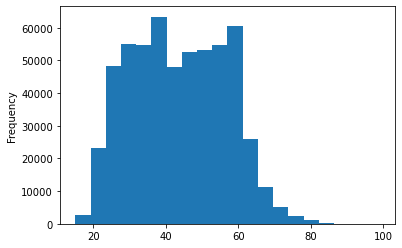

In [ ]:
# Age distribution
df2['PIRL 3056'].plot.hist(bins=20)

In [ ]:
gen_race = df2.groupby(['PIRL201','PIRL 3023'],dropna=False).size()

In [ ]:
gr = gen_race.unstack([1])

In [ ]:
gr.columns

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, nan], dtype='float64', name='PIRL 3023')

In [ ]:
gr.columns = ['Hispanic','Asian','Black',
              'Native Hawaiian or Pacific Islander','American Indian or Alaska Native',
              'White','Multiple Race','Missing']

In [ ]:
gr.index = ['Male','Female','Not Disclosed']

In [ ]:
gr

,Hispanic,Asian,Black,Native Hawaiian or Pacific Islander,American Indian or Alaska Native,White,Multiple Race,Missing
Male,41540.0,9721.0,40080.0,794.0,2100.0,160792.0,5056.0,29307.0
Female,41645.0,9315.0,45463.0,753.0,2041.0,139690.0,4964.0,28366.0
Not Disclosed,111.0,41.0,159.0,NaN,2.0,297.0,9.0,542.0


In [ ]:
# Overall by Gender and Race
gr_pct = gr.div(len(df2))*100
gr_pct

,Hispanic,Asian,Black,Native Hawaiian or Pacific Islander,American Indian or Alaska Native,White,Multiple Race,Missing
Male,7.381110,1.727293,7.121687,0.141083,0.373142,28.570616,0.898384,5.207467
Female,7.399767,1.655153,8.078175,0.133798,0.362659,24.821069,0.882037,5.040264
Not Disclosed,0.019723,0.007285,0.028252,NaN,0.000355,0.052773,0.001599,0.096306


In [ ]:
# Race distribution by Males
gr.loc['Male']/gr.loc['Male'].sum()

Hispanic                               0.143543
Asian                                  0.033591
Black                                  0.138498
Native Hawaiian or Pacific Islander    0.002744
American Indian or Alaska Native       0.007257
White                                  0.555624
Multiple Race                          0.017471
Missing                                0.101272
Name: Male, dtype: float64

In [ ]:
# Race distribution by Females
gr.loc['Female']/gr.loc['Female'].sum()

Hispanic                               0.152973
Asian                                  0.034217
Black                                  0.166998
Native Hawaiian or Pacific Islander    0.002766
American Indian or Alaska Native       0.007497
White                                  0.513119
Multiple Race                          0.018234
Missing                                0.104196
Name: Female, dtype: float64

<AxesSubplot:>

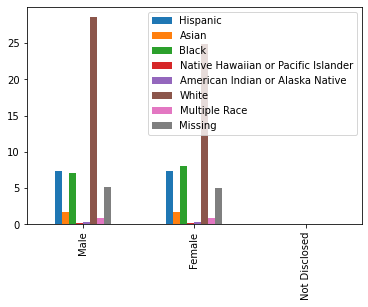

In [ ]:
gr_pct.plot.bar()

In [ ]:
# Distribution by state
df2.groupby('PIRL 3000', dropna=False).size()

PIRL 3000
AK       262
AL      1013
AR       380
AZ      1222
CA     22096
CO      1744
CT      2128
DC       340
DE       433
FL      4291
GA      2128
GU         2
HI       136
IA     14578
ID       363
IL      7373
IN      5696
KS       697
KY     20397
LA      9492
MA      3173
MD      1635
ME       480
MI      3184
MN      1706
MO      8144
MS      2585
MT        82
NC      3107
ND        37
NE       342
NH       513
NJ      4557
NM       321
NV       605
NY    188869
OH      3438
OK       652
OR    130356
PA      8881
PR      2728
PW         5
RI       945
SC      1400
SD       163
TN      2467
TX      6443
UT       775
VA      2615
VI       161
VT       100
WA      2740
WI      2757
WV      2111
WY        84
dtype: int64

In [ ]:
# Distribution, who received training?
training = df2.groupby(['PIRL1300','PIRL1303'], dropna=False).size().unstack(1)
training.index = ['No training','Received training']
training.columns = ['On the Job',
                    'Skill Upgrading',
                    'Entrepreneurial',
                    'ABE or ESL',
                    'Customized',
                    'Occupational Skills',
                    'ABE or ESL funded by Trade Adjustment Assistance only',
                    'Prerequisite',
                    'Registered Apprenticeship',
                    'Youth Occupational Skills Training',
                    'Other Non‐Occupational‐Skills',
                    'Job Readiness',
                    'No Training']
training

,On the Job,Skill Upgrading,Entrepreneurial,ABE or ESL,Customized,Occupational Skills,ABE or ESL funded by Trade Adjustment Assistance only,Prerequisite,Registered Apprenticeship,Youth Occupational Skills Training,Other Non‐Occupational‐Skills,Job Readiness,No Training
No training,422901.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Received training,138.0,7491.0,13367.0,222.0,719.0,519.0,33882.0,527.0,222.0,204.0,29.0,2665.0,46.0


In [ ]:
# Ex-offender?
df2.groupby('PIRL801',dropna=False).size()/len(df)*100

PIRL801
0.0    49.149058
1.0     3.110407
9.0    33.551177
dtype: float64

In [ ]:
# Low-income at entry?
df2.groupby('PIRL802',dropna=False).size()/len(df)*100

PIRL802
0.0    62.098161
1.0    23.712481
dtype: float64

In [ ]:
# SNAP recipient at entry?
df2.groupby('PIRL603',dropna=False).size()/len(df)*100

PIRL603
0.0    73.340050
1.0    11.015160
NaN     1.455433
dtype: float64

In [ ]:
# Sngle parent at entry?
df2.groupby('PIRL806',dropna=False).size()/len(df)*100

PIRL806
0.0    62.574007
1.0    10.184119
9.0    13.052517
dtype: float64

In [ ]:
# Highest grade completed
df2.groupby('PIRL407',dropna=False).size()

PIRL407
0.0       4413
1.0        521
2.0        637
3.0        662
4.0        846
5.0        739
6.0       2770
7.0        958
8.0       2716
9.0       5667
10.0      9180
11.0     17924
12.0    434398
NaN       1501
dtype: int64

In [ ]:
# Most recent industry employed prior to entry
df2.groupby('PIRL 3042',dropna=False).size()

PIRL 3042
33411.0          4
111110.0         7
111130.0         3
111140.0        21
111150.0        18
             ...  
926140.0      1508
926150.0        43
928110.0       765
999999.0     46427
NaN         213035
Length: 1338, dtype: int64

## Final cleaning 

In [ ]:
date_cols = ['PIRL200',
'PIRL304',
'PIRL306',
'PIRL900',
'PIRL901',
'PIRL906',
'PIRL933',
'PIRL1000',
'PIRL1001',
'PIRL1002',
'PIRL1003',
'PIRL1004',
'PIRL1005',
'PIRL1006',
'PIRL1007',
'PIRL1100',
'PIRL1101',
'PIRL1102',
'PIRL1103',
'PIRL1104',
'PIRL1105',
'PIRL1106',
'PIRL1107',
'PIRL1108',
'PIRL1109',
'PIRL1110',
'PIRL1111',
'PIRL1112',
'PIRL1113',
'PIRL1116',
'PIRL1200',
'PIRL1201',
'PIRL1202',
'PIRL1203',
'PIRL1206',
'PIRL1207',
'PIRL1210',
'PIRL1213',
'PIRL1214',
'PIRL1215',
'PIRL1216',
'PIRL1217',
'PIRL1218',
'PIRL1219',
'PIRL1220',
'PIRL1221',
'PIRL1222',
'PIRL1302',
'PIRL1308',
'PIRL1309',
'PIRL1313',
'PIRL1314',
'PIRL1318',
'PIRL1402',
'PIRL1403',
'PIRL1405',
'PIRL1406',
'PIRL1407',
'PIRL1408',
'PIRL1409',
'PIRL1410',
'PIRL1411',
'PIRL1412',
'PIRL1413',
'PIRL1414',
'PIRL1415',
'PIRL1416',
'PIRL1501',
'PIRL1503',
'PIRL1801',
'PIRL1803',
'PIRL1805',
'PIRL1806',
'PIRL1807',
'PIRL1808',
'PIRL1809',
'PIRL1810',
'PIRL1811',
'PIRL1813',
'PIRL1814',
'PIRL1903',
'PIRL1906',
'PIRL1910',
'PIRL1913',
'PIRL1917',
'PIRL2001',
'PIRL2414']

In [ ]:
f = lambda x: 1 if x > 0 else 0

In [ ]:
for i in date_cols:
    if i in df2.columns:
        col = i + '_binary'
        df2[col] = df2[i].apply(f)

In [ ]:
df2['PIRL304']

0         20100312.0
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
562783           NaN
562784           NaN
562785           NaN
562786           NaN
562787           NaN
Name: PIRL304, Length: 562788, dtype: float64

In [ ]:
df2['PIRL304_binary']

0         1
1         0
2         0
3         0
4         0
         ..
562783    0
562784    0
562785    0
562786    0
562787    0
Name: PIRL304_binary, Length: 562788, dtype: int64

In [ ]:
## Focus on workers in slightly narrower age range
age_mask = (df2['PIRL 3056'] > 21) & (df2['PIRL 3056'] < 60)

In [ ]:
df2 = df2[age_mask]

In [ ]:
# Gender (very few, but drop those that didn't state gender)
df2 = df2[df2['PIRL201']!=9]

In [ ]:
df2['PIRL201'].value_counts()

1.0    246732
2.0    236200
Name: PIRL201, dtype: int64

In [ ]:
df2.groupby('PIRL201').agg({'PIRL1700':'count','PIRL1701':'mean'})

,PIRL1700,PIRL1701
PIRL201,,
1.0,245691,11248.426952
2.0,234511,8872.310650


In [ ]:
# Drop duplicates over ID

In [ ]:
len(df2['PIRL100']) - len(df2['PIRL100'].unique())

23898

In [ ]:
df2 = df2.drop_duplicates(subset='PIRL100')

In [ ]:
df2.set_index('PIRL100', inplace=True)

In [ ]:
df2.head()

,PIRL 3000,PIRL 3001,PIRL 3002,PIRL 3003,PIRL 3004,PIRL 3005,PIRL 3006,PIRL 3013,PIRL 3015,PIRL 3017,...,PIRL1112_binary,PIRL1116_binary,PIRL1200_binary,PIRL1201_binary,PIRL1202_binary,PIRL1302_binary,PIRL1308_binary,PIRL1801_binary,PIRL1811_binary,PIRL1813_binary
PIRL100,,,,,,,,,,,,,,,,,,,,,
054A4Aa0cUca,AK,0.0,1.0,0.0,0.0,0.0,0.0,1.0,10316.0,NaN,...,0,0,1,1,1,0,0,0,0,0
055aAD9eLAS4,AK,0.0,1.0,0.0,0.0,0.0,0.0,1.0,483.0,0.0,...,0,0,1,1,1,0,0,0,0,0
09ULAA0DDeUL,AK,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4235.0,1.0,...,0,0,1,1,1,0,0,0,0,0
09a9U0A0A5Ub,AK,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8935.0,1.0,...,0,0,1,1,1,0,0,0,1,0
0AbSU5fb5cd5,AK,0.0,1.0,0.0,0.0,0.0,0.0,1.0,20974.0,1.0,...,0,0,1,1,1,1,1,0,1,1


In [ ]:
# Initial list of relevant features

In [ ]:
features = [
'PIRL904',
'PIRL 3000',
'PIRL201',
'PIRL 3056',
'PIRL202',
'PIRL 3023',
'PIRL300',
'PIRL400',
'PIRL402',
'PIRL407',
'PIRL408',
'PIRL409',
'PIRL600',
'PIRL602',
'PIRL603',
'PIRL800',
'PIRL801',
'PIRL802',
'PIRL803',
'PIRL804',
'PIRL805',
'PIRL806',
'PIRL807',
'PIRL908',
'PIRL918',
'PIRL932',
'PIRL1000_binary',
'PIRL1001_binary',
'PIRL1100_binary',
'PIRL1101_binary',
'PIRL1102_binary',
'PIRL1103_binary',
'PIRL1104_binary',
'PIRL1105_binary',
'PIRL1106_binary',
'PIRL1107_binary',
'PIRL1112_binary',
'PIRL1116_binary',
'PIRL1200_binary',
'PIRL1201_binary',
'PIRL1202_binary',
'PIRL1205',
'PIRL1211',
'PIRL1300',
'PIRL1303',
'PIRL1304',
'PIRL1306',
'PIRL1310',
'PIRL1332',
'PIRL1333',
'PIRL404',
'PIRL1307',
'PIRL1319',
'PIRL1702',
'PIRL1704',
'PIRL1602'
]

In [ ]:
df3 = df2[features]
df3.head()

,PIRL904,PIRL 3000,PIRL201,PIRL 3056,PIRL202,PIRL 3023,PIRL300,PIRL400,PIRL402,PIRL407,...,PIRL1304,PIRL1306,PIRL1310,PIRL1332,PIRL1333,PIRL404,PIRL1307,PIRL1319,PIRL1702,PIRL1704
PIRL100,,,,,,,,,,,,,,,,,,,,,
054A4Aa0cUca,3.0,AK,1.0,33.0,0.0,6.0,1.0,0.0,0.0,12.0,...,NaN,NaN,0.0,0.0,NaN,481112.0,NaN,NaN,6506.0,10316.0
055aAD9eLAS4,3.0,AK,2.0,42.0,0.0,6.0,0.0,1.0,1.0,11.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,483.0
09ULAA0DDeUL,3.0,AK,1.0,22.0,0.0,6.0,0.0,0.0,0.0,12.0,...,NaN,NaN,0.0,0.0,NaN,237130.0,NaN,NaN,6877.0,4235.0
09a9U0A0A5Ub,3.0,AK,1.0,25.0,0.0,6.0,0.0,0.0,1.0,12.0,...,NaN,NaN,0.0,1.0,NaN,238220.0,NaN,NaN,8321.0,8935.0
0AbSU5fb5cd5,3.0,AK,1.0,23.0,0.0,5.0,0.0,0.0,0.0,12.0,...,89.0,47211100.0,0.0,0.0,0.0,238210.0,1.0,1.0,14893.0,20974.0


In [ ]:
df3.to_csv('WIOA_clean.csv')

## From clean .csv, custom recoding


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Upload our clean csv
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv('WIOA_clean.csv', index_col=0)

In [ ]:
df.head()

,PIRL904,PIRL 3000,PIRL201,PIRL 3056,PIRL202,PIRL 3023,PIRL300,PIRL400,PIRL402,PIRL407,PIRL408,PIRL409,PIRL600,PIRL602,PIRL603,PIRL800,PIRL801,PIRL802,PIRL803,PIRL804,PIRL805,PIRL806,PIRL807,PIRL908,PIRL918,PIRL932,PIRL1000_binary,PIRL1001_binary,PIRL1100_binary,PIRL1101_binary,PIRL1102_binary,PIRL1103_binary,PIRL1104_binary,PIRL1105_binary,PIRL1106_binary,PIRL1107_binary,PIRL1112_binary,PIRL1116_binary,PIRL1200_binary,PIRL1201,PIRL1202_binary,PIRL1205,PIRL1211,PIRL1300,PIRL1303,PIRL1304,PIRL1306,PIRL1310,PIRL1332,PIRL1333,PIRL404,PIRL1307,PIRL1319,PIRL1702,PIRL1704,PIRL1602
PIRL100,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
054A4Aa0cUca,3.0,AK,1.0,33.0,0.0,6.0,1.0,0.0,0.0,12.0,5.0,5.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,9.0,0.0,0.0,0.0,9.0,0.0,1,1,1,1,1,1,1,0,0,0,0,0,1,20170700.0,1,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,481112.0,NaN,NaN,6506.0,10316.0,1
055aAD9eLAS4,3.0,AK,2.0,42.0,0.0,6.0,0.0,1.0,1.0,11.0,0.0,4.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,9.0,1.0,1.0,0.0,9.0,0.0,1,1,1,0,1,1,1,0,0,0,0,0,1,20160900.0,1,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,483.0,1
09ULAA0DDeUL,3.0,AK,1.0,22.0,0.0,6.0,0.0,0.0,0.0,12.0,1.0,5.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,9.0,0.0,1,1,1,1,1,1,1,0,0,0,0,0,1,20170124.0,1,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,237130.0,NaN,NaN,6877.0,4235.0,1
09a9U0A0A5Ub,3.0,AK,1.0,25.0,0.0,6.0,0.0,0.0,1.0,12.0,1.0,3.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,9.0,0.0,0.0,0.0,9.0,0.0,1,1,1,1,1,1,1,0,0,0,0,0,1,20170116.0,1,0.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,NaN,238220.0,NaN,NaN,8321.0,8935.0,1
0AbSU5fb5cd5,3.0,AK,1.0,23.0,0.0,5.0,0.0,0.0,0.0,12.0,1.0,5.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,9.0,0.0,1,1,1,1,1,1,1,0,0,0,0,0,1,20170410.0,1,0.0,0.0,1.0,9.0,89.0,47211100.0,0.0,0.0,0.0,238210.0,1.0,1.0,14893.0,20974.0,1


In [ ]:
## Some columns require refactoring into groups
## For example, this category lists ALL programs for which participants are eligible
## So, 89 means participant eligible for program 8 and program 9
## Basic OneHotEncoding cannot handle this
df['PIRL1304'][:20]

PIRL100
054A4Aa0cUca      NaN
055aAD9eLAS4      NaN
09ULAA0DDeUL      NaN
09a9U0A0A5Ub      NaN
0AbSU5fb5cd5     89.0
0DDdbFaDSU4L    489.0
0F9DSc0FdeFe    289.0
0L5U44bS4DdS     89.0
0LU5dSbb9FD9    389.0
0U4eedc4ea9b    289.0
409bb54FeS0d    189.0
40S9ASfD99Fd     89.0
449fASc4LAb4      NaN
44F050S5e55e    289.0
459be0cSbUcA    589.0
45U49SDfdAAf    289.0
45beU4FAbLSD    189.0
49bb5db99Sb4    289.0
4D9USDfUaAbU    189.0
4FU5A5acUcD5     89.0
Name: PIRL1304, dtype: float64

In [ ]:
def eligible(x, value):
    if np.isnan(x):
        return np.nan
    else:
        x = str(int(x))
        if str(value) in x:
            return 1
        else:
            return 0

In [ ]:
for i in range(1,10):
    col = 'PIRL1304_' + str(i)
    df[col] = df['PIRL1304'].apply(lambda x: eligible(x, i))

In [ ]:
df['PIRL1304_8'][:20]

PIRL100
054A4Aa0cUca    NaN
055aAD9eLAS4    NaN
09ULAA0DDeUL    NaN
09a9U0A0A5Ub    NaN
0AbSU5fb5cd5    1.0
0DDdbFaDSU4L    1.0
0F9DSc0FdeFe    1.0
0L5U44bS4DdS    1.0
0LU5dSbb9FD9    1.0
0U4eedc4ea9b    1.0
409bb54FeS0d    1.0
40S9ASfD99Fd    1.0
449fASc4LAb4    NaN
44F050S5e55e    1.0
459be0cSbUcA    1.0
45U49SDfdAAf    1.0
45beU4FAbLSD    1.0
49bb5db99Sb4    1.0
4D9USDfUaAbU    1.0
4FU5A5acUcD5    1.0
Name: PIRL1304_8, dtype: float64

In [ ]:
## ONET occupational codes are 8 digits, but the first 2 digits denote JOB FAMILY
## Group by family for encoding
df['PIRL1306'][:20]

PIRL100
054A4Aa0cUca           NaN
055aAD9eLAS4           NaN
09ULAA0DDeUL           NaN
09a9U0A0A5Ub           NaN
0AbSU5fb5cd5    47211100.0
0DDdbFaDSU4L           NaN
0F9DSc0FdeFe    49905100.0
0L5U44bS4DdS           NaN
0LU5dSbb9FD9           NaN
0U4eedc4ea9b    47211100.0
409bb54FeS0d           NaN
40S9ASfD99Fd           NaN
449fASc4LAb4           NaN
44F050S5e55e           NaN
459be0cSbUcA           NaN
45U49SDfdAAf           NaN
45beU4FAbLSD           NaN
49bb5db99Sb4    47207300.0
4D9USDfUaAbU           NaN
4FU5A5acUcD5    47211100.0
Name: PIRL1306, dtype: float64

In [ ]:
df['PIRL1306'].apply(lambda x: str(int(x))[:2] if x>0 else np.nan).unique()

array([nan, '47', '49', '17', '53', '29', '51', '31', '41', '11', '13',
       '15', '25', '43', '40', '37', '33', '35', '39', '27', '21', '19',
       '23', '45', '87', '86', '10', '20', '52', '55', '57'], dtype=object)

In [ ]:
# Onet has job families for their occupation codes. For reference:
onet = {'17':'Architecture and Engineering Occupations',
'27':'Arts, Design, Entertainment, Sports, and Media Occupations',
'37':'Building and Grounds Cleaning and Maintenance Occupations',
'13':'Business and Financial Operations Occupations',
'21':'Community and Social Service Occupations',
'15':'Computer and Mathematical Occupations',
'47':'Construction and Extraction Occupations',
'25':'Educational Instruction and Library Occupations',
'45':'Farming, Fishing, and Forestry Occupations',
'35':'Food Preparation and Serving Related Occupations',
'29':'Healthcare Practitioners and Technical Occupations',
'31':'Healthcare Support Occupations',
'49':'Installation, Maintenance, and Repair Occupations',
'23':'Legal Occupations',
'19':'Life, Physical, and Social Science Occupations',
'11':'Management Occupations',
'55':'Military Specific Occupations',
'43':'Office and Administrative Support Occupations',
'39':'Personal Care and Service Occupations',
'51':'Production Occupations',
'33':'Protective Service Occupations',
'41':'Sales and Related Occupations',
'53':'Transportation and Material Moving Occupations'}

In [ ]:
family = list(df['PIRL1306'].apply(lambda x: str(int(x))[:2] if x>0 else np.nan).unique())[1:]
family[:5]

['47', '49', '17', '53', '29']

In [ ]:
def jobfam(x, value):
    if np.isnan(x):
        return np.nan
    else:
        x = str(int(x))[:2]
        if value==x:
            return 1
        else:
            return 0

In [ ]:
for i in family:
    col = 'PIRL1306_' + i
    df[col] = df['PIRL1306'].apply(lambda x: jobfam(x, i))

In [ ]:
# Test, look at job family '47'
df['PIRL1306_47'][:20]

PIRL100
054A4Aa0cUca    NaN
055aAD9eLAS4    NaN
09ULAA0DDeUL    NaN
09a9U0A0A5Ub    NaN
0AbSU5fb5cd5    1.0
0DDdbFaDSU4L    NaN
0F9DSc0FdeFe    0.0
0L5U44bS4DdS    NaN
0LU5dSbb9FD9    NaN
0U4eedc4ea9b    1.0
409bb54FeS0d    NaN
40S9ASfD99Fd    NaN
449fASc4LAb4    NaN
44F050S5e55e    NaN
459be0cSbUcA    NaN
45U49SDfdAAf    NaN
45beU4FAbLSD    NaN
49bb5db99Sb4    1.0
4D9USDfUaAbU    NaN
4FU5A5acUcD5    1.0
Name: PIRL1306_47, dtype: float64

In [ ]:
## Industry code is similar, we have groupings
df['PIRL404'][:20]

PIRL100
054A4Aa0cUca    481112.0
055aAD9eLAS4         NaN
09ULAA0DDeUL    237130.0
09a9U0A0A5Ub    238220.0
0AbSU5fb5cd5    238210.0
0DDdbFaDSU4L    622110.0
0F9DSc0FdeFe    237130.0
0L5U44bS4DdS    213112.0
0LU5dSbb9FD9         NaN
0U4eedc4ea9b         NaN
409bb54FeS0d    212321.0
40S9ASfD99Fd    483113.0
449fASc4LAb4    113310.0
44F050S5e55e    621310.0
459be0cSbUcA    999999.0
45U49SDfdAAf    221122.0
45beU4FAbLSD         NaN
49bb5db99Sb4    484110.0
4D9USDfUaAbU         NaN
4FU5A5acUcD5         NaN
Name: PIRL404, dtype: float64

In [ ]:
#NAICS Industry CODES
'''Code 	Industry Title 	Number of Business Establishments
11	Agriculture, Forestry, Fishing and Hunting	382,038
21	Mining	32,529
22	Utilities	47,917
23	Construction	1,526,509
31-33	Manufacturing	643,451
42	Wholesale Trade	701,077
44-45	Retail Trade	1,824,281
48-49	Transportation and Warehousing	614,334
51	Information	368,730
52	Finance and Insurance	792,376
53	Real Estate Rental and Leasing	891,450
54	Professional, Scientific, and Technical Services	2,370,906
55	Management of Companies and Enterprises	75,714
56	Administrative and Support and Waste Management and Remediation Services	1,662,201
61	Educational Services	431,622
62	Health Care and Social Assistance	1,778,521
71	Arts, Entertainment, and Recreation	379,799
72	Accommodation and Food Services	913,929
81	Other Services (except Public Administration)	1,947,031
92	Public Administration	256,383'''

'Code \tIndustry Title \tNumber of Business Establishments\n11\tAgriculture, Forestry, Fishing and Hunting\t382,038\n21\tMining\t32,529\n22\tUtilities\t47,917\n23\tConstruction\t1,526,509\n31-33\tManufacturing\t643,451\n42\tWholesale Trade\t701,077\n44-45\tRetail Trade\t1,824,281\n48-49\tTransportation and Warehousing\t614,334\n51\tInformation\t368,730\n52\tFinance and Insurance\t792,376\n53\tReal Estate Rental and Leasing\t891,450\n54\tProfessional, Scientific, and Technical Services\t2,370,906\n55\tManagement of Companies and Enterprises\t75,714\n56\tAdministrative and Support and Waste Management and Remediation Services\t1,662,201\n61\tEducational Services\t431,622\n62\tHealth Care and Social Assistance\t1,778,521\n71\tArts, Entertainment, and Recreation\t379,799\n72\tAccommodation and Food Services\t913,929\n81\tOther Services (except Public Administration)\t1,947,031\n92\tPublic Administration\t256,383'

In [ ]:
industry = list(df['PIRL404'].apply(lambda x: str(int(x))[:2] if x>0 else np.nan).unique())

In [ ]:
industry[:5]

['48', nan, '23', '62', '21']

In [ ]:
industry.pop(1)

nan

In [ ]:
for i in industry:
    col = 'PIRL404_' + i
    df[col] = df['PIRL404'].apply(lambda x: jobfam(x, i))

In [ ]:
df['PIRL404_23']

PIRL100
054A4Aa0cUca    0.0
055aAD9eLAS4    NaN
09ULAA0DDeUL    1.0
09a9U0A0A5Ub    1.0
0AbSU5fb5cd5    1.0
               ... 
f4S4FS5d5f95    NaN
fFaF40D5bS4U    0.0
fb5Sfa4e9dbe    0.0
fbe4eDbcUUdc    0.0
feAeSFeLF5aF    0.0
Name: PIRL404_23, Length: 459034, dtype: float64

In [ ]:
df = df.drop(columns=['PIRL404', 'PIRL1304', 'PIRL1306', 'PIRL1201'])

In [ ]:
# Replace 9s with NaN values for variables where 9 was denoted for "did not disclose."
cols9 = ['PIRL202', 'PIRL300', 'PIRL801', 'PIRL805', 'PIRL806', 'PIRL908', 'PIRL918', 'PIRL932']
for col in cols9:
  df[col].replace(9, np.NaN, inplace=True)

In [ ]:
# Replace missing values with standard numeric value to create a missingness indicator
catcols = ['PIRL400', 'PIRL408', 'PIRL409', 'PIRL602', 'PIRL1205', 'PIRL1303', 'PIRL1310', 'PIRL 3023']
for col in catcols:
  df[col].replace(np.NaN, 9999, inplace=True)

df.to_csv('WIOA_clean_v2.csv')

[Back to top](#bt)
#Machine Learning <a name="m1"></a>


## Load data, test for correlations, preprocess

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Upload our clean csv
from google.colab import files
uploaded = files.upload()

Saving WIOA_clean_v2.csv to WIOA_clean_v2 (1).csv


In [ ]:
dfo = pd.read_csv('WIOA_clean_v2.csv', index_col=0)
dfo.head()

,PIRL201,PIRL202,PIRL300,PIRL400,PIRL402,PIRL407,PIRL408,PIRL409,PIRL600,PIRL602,PIRL603,PIRL800,PIRL801,PIRL802,PIRL803,PIRL804,PIRL805,PIRL806,PIRL807,PIRL904,PIRL908,PIRL918,PIRL932,PIRL1000_binary,PIRL1001_binary,PIRL1100_binary,PIRL1101_binary,PIRL1102_binary,PIRL1103_binary,PIRL1104_binary,PIRL1105_binary,PIRL1106_binary,PIRL1107_binary,PIRL1112_binary,PIRL1116_binary,PIRL1200_binary,PIRL1201_binary,PIRL1202_binary,PIRL1205,PIRL1211,...,PIRL1306_33,PIRL1306_35,PIRL1306_39,PIRL1306_27,PIRL1306_21,PIRL1306_19,PIRL1306_23,PIRL1306_45,PIRL1306_87,PIRL1306_86,PIRL1306_10,PIRL1306_20,PIRL1306_52,PIRL1306_55,PIRL1306_57,PIRL404_48,PIRL404_23,PIRL404_62,PIRL404_21,PIRL404_11,PIRL404_99,PIRL404_22,PIRL404_42,PIRL404_56,PIRL404_44,PIRL404_81,PIRL404_54,PIRL404_61,PIRL404_72,PIRL404_92,PIRL404_53,PIRL404_31,PIRL404_45,PIRL404_71,PIRL404_55,PIRL404_49,PIRL404_52,PIRL404_33,PIRL404_32,PIRL404_51
PIRL100,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
054A4Aa0cUca,1.0,0.0,1.0,0.0,0.0,12.0,5.0,5.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,NaN,0.0,0.0,3.0,0.0,NaN,0.0,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
055aAD9eLAS4,2.0,0.0,0.0,1.0,1.0,11.0,0.0,4.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,NaN,1.0,1.0,3.0,0.0,NaN,0.0,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09ULAA0DDeUL,1.0,0.0,0.0,0.0,0.0,12.0,1.0,5.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,3.0,0.0,NaN,0.0,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09a9U0A0A5Ub,1.0,0.0,0.0,0.0,1.0,12.0,1.0,3.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,NaN,0.0,0.0,3.0,0.0,NaN,0.0,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0AbSU5fb5cd5,1.0,0.0,0.0,0.0,0.0,12.0,1.0,5.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,3.0,0.0,NaN,0.0,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
state_fips = {
    'AL':1,
    'AK':2,
    'AZ':4,
    'AR':5,
    'CA':6,
    'CO':8,
    'CT':9,
    'DE':10,
    'FL':12,
    'GA':13,
    'HI':15,
    'ID':16,
    'IL':17,
    'IN':18,
    'IA':19,
    'KS':20,
    'KY':21,
    'LA':22,
    'ME':23,
    'MD':24,
    'MA':25,
    'MI':26,
    'MN':27,
    'MS':28,
    'MO':29,
    'MT':30,
    'NE':31,
    'NV':32,
    'NH':33,
    'NJ':34,
    'NM':35,
    'NY':36,
    'NC':37,
    'ND':38,
    'OH':39,
    'OK':40,
    'OR':41,
    'PA':42,
    'RI':44,
    'SC':45,
    'SD':46,
    'TN':47,
    'TX':48,
    'UT':49,
    'VT':50,
    'VA':51,
    'WA':53,
    'WV':54,
    'WI':55,
    'WY':56,
    'AS':60,
    'GU':66,
    'MP':69,
    'PR':72,
    'VI':78,
    'DC':79,
    'PW':80}

In [ ]:
df = dfo.copy()
df['PIRL 3000'] = df['PIRL 3000'].apply(lambda x: state_fips[x])

In [ ]:
# Use a sample of the dataset for efficiency
df_sample = df.sample(frac=0.2, random_state=1)

### Correlation matrix

We have many features, especially given so many are binary or indicators (like state of residence). The matrix shows there is little to no correlation between most of these variables, however. Indeed, many are rather sparse and missingness can be meaningful, so we will move forward by coding variables as 1/0 values and include missingness indicators for all columns with missingness so we do not lose this potentially useful information. 

In [ ]:
corr_df = df.corr()

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.05, 'Correlation Matrix')

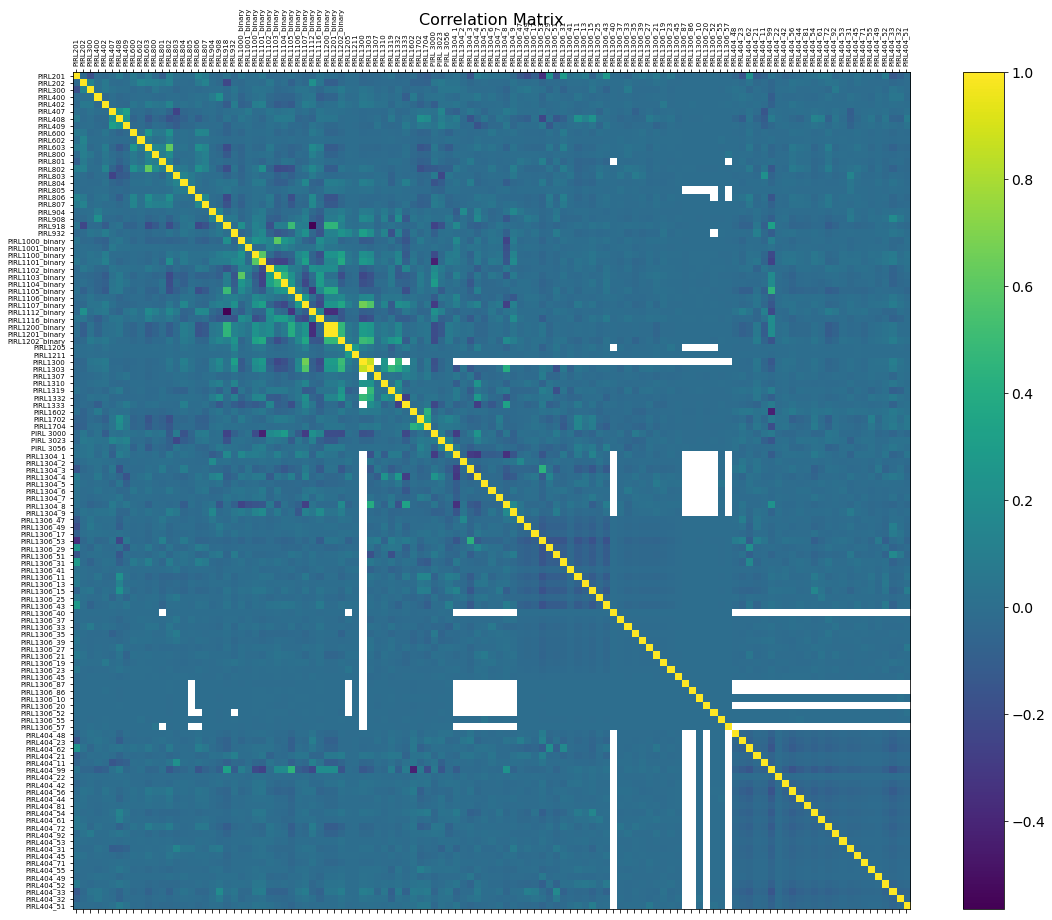

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr_df, fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=7, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=7)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

### Set labels

In [ ]:
# List of features to exclude 
#(always exclude 'PIRL1704' and 'PIRL1602' as these 2 are labels)
exclude = ['PIRL1704', 'PIRL1602']

In [ ]:
# Set to sample for testing!

In [ ]:
X = df_sample.drop(columns=exclude)
X.shape

In [ ]:
# Flip labels such that 1 becomes those not employed (category of interest)
df_sample.PIRL1602.apply(lambda x: 1 if x == 0 else 0).value_counts()

In [ ]:
# Original prior 
124197/(124197+334837)

In [ ]:
# Sample prior
24916/(24916+66891)

In [ ]:
y = df_sample.PIRL1602.apply(lambda x: 1 if x == 0 else 0)
y.shape

### Preprocessing

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
job_codes = ['PIRL1304_1', 'PIRL1304_2', 'PIRL1304_3', 'PIRL1304_4', 'PIRL1304_5', 'PIRL1304_6',
 'PIRL1304_7', 'PIRL1304_8', 'PIRL1304_9', 'PIRL1306_10', 'PIRL1306_11', 'PIRL1306_13', 'PIRL1306_15',
 'PIRL1306_17', 'PIRL1306_19', 'PIRL1306_20', 'PIRL1306_21', 'PIRL1306_23', 'PIRL1306_25', 'PIRL1306_27',
 'PIRL1306_29', 'PIRL1306_31', 'PIRL1306_33', 'PIRL1306_35', 'PIRL1306_37', 'PIRL1306_39',
 'PIRL1306_40', 'PIRL1306_41', 'PIRL1306_43', 'PIRL1306_45', 'PIRL1306_47', 'PIRL1306_49', 'PIRL1306_51',
 'PIRL1306_52', 'PIRL1306_53', 'PIRL1306_55', 'PIRL1306_57', 'PIRL1306_86', 'PIRL1306_87', 'PIRL404_11',
 'PIRL404_21', 'PIRL404_22', 'PIRL404_23', 'PIRL404_31', 'PIRL404_32', 'PIRL404_33', 'PIRL404_42',
 'PIRL404_44', 'PIRL404_45', 'PIRL404_48', 'PIRL404_49', 'PIRL404_51', 'PIRL404_52', 'PIRL404_53',
 'PIRL404_54', 'PIRL404_55', 'PIRL404_56', 'PIRL404_61', 'PIRL404_62', 'PIRL404_71', 'PIRL404_72',
 'PIRL404_81', 'PIRL404_92', 'PIRL404_99']

In [ ]:
binary_features = ['PIRL1319','PIRL1332','PIRL1333','PIRL1307',
'PIRL1211','PIRL1300','PIRL908','PIRL918','PIRL932','PIRL1000_binary','PIRL1001_binary',
'PIRL1100_binary','PIRL1101_binary','PIRL1102_binary','PIRL1103_binary',
'PIRL1104_binary','PIRL1105_binary','PIRL1106_binary','PIRL1107_binary','PIRL1112_binary',
'PIRL1116_binary','PIRL1200_binary','PIRL1201_binary','PIRL1202_binary','PIRL800',
'PIRL801','PIRL802','PIRL803','PIRL804','PIRL805','PIRL806','PIRL807',
'PIRL603','PIRL202','PIRL300','PIRL402','PIRL600']

In [ ]:
cat_features = ['PIRL201', 'PIRL400', 'PIRL407','PIRL408',  'PIRL409', 'PIRL602', 
 'PIRL904', 'PIRL1205', 'PIRL1303', 'PIRL1310', 'PIRL 3023']

In [ ]:
obj_features = ['PIRL 3000'] # States as 2-letter codes, converted to FIPS codes

In [ ]:
num_features = ['PIRL1702', 'PIRL 3056'] # wage

### Components

In [ ]:
# Encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# Imputers
median_imp = SimpleImputer(missing_values=np.nan, strategy = 'median', 
                        add_indicator=True)

mean_imp = SimpleImputer(missing_values=np.nan, strategy = 'mean', 
                        add_indicator=True)

obj_imp = SimpleImputer(missing_values=np.nan, strategy = 'constant', 
                        fill_value='missing', add_indicator=True)

zero_imp = SimpleImputer(missing_values=np.nan, strategy = 'constant', 
                         fill_value=0, add_indicator=True)

In [ ]:
# Scalers
std_scaler = StandardScaler()

In [ ]:
# Transformers

In [ ]:
cat_transformer = Pipeline(steps=[
    ('imputer', zero_imp),
    ('onehot', ohe)])

In [ ]:
obj_transformer = Pipeline(steps=[
    ('imputer', obj_imp),
    ('onehot', ohe)])

In [ ]:
zero_scale_transformer = Pipeline(steps=[
    ('scaler', std_scaler),
    ('imputer', zero_imp)])

In [ ]:
med_impute_transformer = Pipeline(steps=[
    ('imputer', median_imp)])

In [ ]:
basic_impute_transformer = Pipeline(steps=[
    ('imputer', zero_imp)])

### Preprocessor configs

In [ ]:
lgr_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_features),
        ('num', zero_scale_transformer, num_features),
        ('obj', obj_transformer, obj_features)],
        remainder=basic_impute_transformer)

In [ ]:
# Let nothing pass by to get feature names after imputation for tree models.....
tree_preprocessor = ColumnTransformer(
    transformers=[
        ('job', basic_impute_transformer,job_codes),
        ('bin', basic_impute_transformer,binary_features),
        ('num', med_impute_transformer, num_features),
        ('obj', obj_transformer, obj_features),
        ('cat', cat_transformer, cat_features)],
        remainder="passthrough")

## Classify, train and predict

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import _VectorizerMixin
from sklearn.feature_selection._base import SelectorMixin
from sklearn.metrics import accuracy_score, precision_score, average_precision_score, precision_recall_curve, roc_curve

In [ ]:
lgr = LogisticRegression(solver = 'liblinear',max_iter=1000)
dt = DecisionTreeClassifier(criterion = 'gini', max_depth=10)
rf = RandomForestClassifier(n_jobs=4)
xgb = XGBClassifier()

### Models

In [ ]:
clf = Pipeline(steps=[('preprocessor', lgr_preprocessor),
                      ('classifier', lgr)]) # lgr used in first run

In [ ]:
clf = Pipeline(steps=[('preprocessor', tree_preprocessor),
                      ('classifier', dt)]) # for rf/boosted trees

In [ ]:
clf = Pipeline(steps=[('preprocessor', tree_preprocessor),
                      ('classifier', rf)]) # for rf/boosted trees

### Data split

In [ ]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
#clf.classes_;

[Back to top](#bt)
#Results <a name="r1"></a>

We found that tree models performed slightly better with respect to precision than the logistic regression model. The differences were narrow, however, and all models substantially outperform our baseline.

We fit with `predict_proba` after checking basic accuracy as this enables us to identify thresholds and consider the distribution of risk scores the model generates. We also perform a "precision at 10%" calculation to see if the models are more or less accurate when considering the top decile of risk. 

In [ ]:
clf.fit(X_train,y_train);

### Basic accuracy w/ `.score`

In [ ]:
# to store models
import pickle

In [ ]:
pkl_file = 'rf_1.pkl'

with open(pkl_file, 'wb') as f:
    pickle.dump(clf, f)

In [ ]:
# Logistic regression
clf.score(X_test, y_test)

0.7783278872495627

In [ ]:
# Decision tree
clf.score(X_test, y_test)

0.7800772353698386

In [ ]:
# Random forest
clf.score(X_test, y_test)

0.7744661187576327

## Precision Score with `predict.proba()`

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.metrics import confusion_matrix

### Logistic regression

In [ ]:
# raw risk scores
raw_risks = clf.predict_proba(X_test)[:,1]
raw_risks[:10]

array([0.17808417, 0.79314169, 0.22133305, 0.21160895, 0.10575768,
       0.18901269, 0.06579117, 0.34358049, 0.18745199, 0.26143209])

C:\Users\danie\anaconda_3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

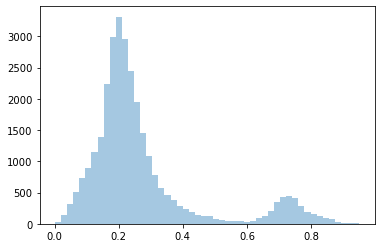

In [ ]:
sns.distplot(raw_risks, kde=False, rug=False)

In [ ]:
calc_threshold = lambda x,y: 0 if x < y else 1

In [ ]:
preds = np.array([calc_threshold(risk, 0.6) for risk in raw_risks])

In [ ]:
confusion_matrix(y_test, preds)

array([[21287,   827],
       [ 5912,  2271]], dtype=int64)

In [ ]:
accuracy_score(y_test, preds)

0.7775687361784995

In [ ]:
precision_score(y_test, preds)

0.7330535829567463

**Precision @ 10%**

In [ ]:
def prec_at_k(clf, X, y, k=0.1):
    
    raw_risks = clf.predict_proba(X)[:,1]
    
    test_risk_df = pd.DataFrame(index=X.index,
                            data=raw_risks,
                            columns=["Risk"]).join(y.rename('Label'))
    
    test_risk_df.sort_values('Risk', inplace=True, ascending=False)

    top_k_pct = int(np.ceil(k * test_risk_df.shape[0]))
    
    predictions = test_risk_df.head(top_k_pct)
    
    precision = predictions['Label'].mean()
    
    return precision

In [ ]:
prec_at_k(clf, X_test, y_test, k=0.10)

0.7356435643564356

### Decision tree

In [ ]:
# raw risk scores
raw_risks = clf.predict_proba(X_test)[:,1]
raw_risks[:10]

array([0.24073555, 0.89130435, 0.35785953, 0.18380615, 0.1677675 ,
       0.11914806, 0.1125    , 0.29669997, 0.13256881, 0.11914806])

C:\Users\danie\anaconda_3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

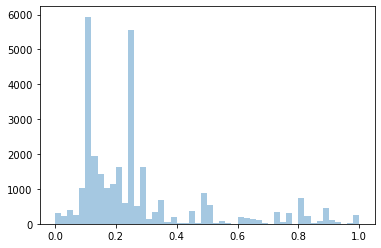

In [ ]:
sns.distplot(raw_risks, kde=False, rug=False)

In [ ]:
calc_threshold = lambda x,y: 0 if x < y else 1

In [ ]:
preds = np.array([calc_threshold(risk, 0.7) for risk in raw_risks])

In [ ]:
confusion_matrix(y_test, preds)

array([[21461,   653],
       [ 6153,  2030]], dtype=int64)

In [ ]:
accuracy_score(y_test, preds)

0.7753572961019243

In [ ]:
precision_score(y_test, preds)

0.7566157286619456

**Precision @ 10%**

In [ ]:
def prec_at_k(clf, X, y, k=0.1):
    
    raw_risks = clf.predict_proba(X)[:,1]
    
    test_risk_df = pd.DataFrame(index=X.index,
                            data=raw_risks,
                            columns=["Risk"]).join(y.rename('Label'))
    
    test_risk_df.sort_values('Risk', inplace=True, ascending=False)

    top_k_pct = int(np.ceil(k * test_risk_df.shape[0]))
    
    predictions = test_risk_df.head(top_k_pct)
    
    precision = predictions['Label'].mean()
    
    return precision

In [ ]:
prec_at_k(clf, X_test, y_test, k=0.10)

0.7442244224422442

### Random forest

In [ ]:
# raw risk scores
raw_risks = clf.predict_proba(X_test)[:,1]
raw_risks[:10]

array([0.27, 0.95, 0.44, 0.23, 0.1 , 0.11, 0.14, 0.25, 0.08, 0.2 ])

C:\Users\danie\anaconda_3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

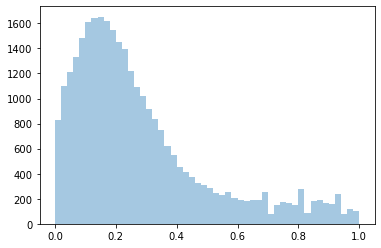

In [ ]:
sns.distplot(raw_risks, kde=False, rug=False)

In [ ]:
calc_threshold = lambda x,y: 0 if x < y else 1

In [ ]:
preds = np.array([calc_threshold(risk, 0.7) for risk in raw_risks])

In [ ]:
confusion_matrix(y_test, preds)

array([[21543,   571],
       [ 6359,  1824]], dtype=int64)

In [ ]:
accuracy_score(y_test, preds)

0.7712644816318447

In [ ]:
precision_score(y_test, preds)

0.7615866388308977

**Precision @ 10%**

In [ ]:
def prec_at_k(clf, X, y, k=0.1):
    
    raw_risks = clf.predict_proba(X)[:,1]
    
    test_risk_df = pd.DataFrame(index=X.index,
                            data=raw_risks,
                            columns=["Risk"]).join(y.rename('Label'))
    
    test_risk_df.sort_values('Risk', inplace=True, ascending=False)

    top_k_pct = int(np.ceil(k * test_risk_df.shape[0]))
    
    predictions = test_risk_df.head(top_k_pct)
    
    precision = predictions['Label'].mean()
    
    return precision

In [ ]:
prec_at_k(clf, X_test, y_test, k=0.10)

0.7201320132013201

[Back to top](#bt)
#Grid Search <a name="g1"></a>

A grid search is conducted to optimize chosen models. Basic search has been performed sue to computational constraints, but the process shows gains can be had on metrics of concern. 

The random forest showed the greatest gain in precision with our search. Given there are many hyperparameters that may be tuned with this model, we could expect greater gains with an exhaustive search. Logistic regression and Random Forest are used in visualization following the grid search examples to continue our proof of concept. 

### Grid configs

In [ ]:
lgr_grid = {'classifier__penalty':['l1', 'l2'],
           'classifier__C': [0.1, 1, 10]}

In [ ]:
dt_grid = {'classifier__max_depth':[5,7,10,12],
          'classifier__splitter':['best'],
          'classifier__min_samples_split':[20,200],
          'classifier__min_samples_leaf':[10,100]}

In [ ]:
rf_grid = {'classifier__max_depth':[5, 20],
          'classifier__n_estimators':[500],
          'classifier__min_samples_split':[20],
          'classifier__max_features': ['sqrt'],
          'classifier__n_jobs': [4]}

In [ ]:
rf_grid = {'classifier__n_estimators':[500,1000],
          'classifier__min_samples_split':[2,20],
          'classifier__max_features': ['sqrt'],
          'classifier__n_jobs': [4]}

In [ ]:
# Change configs
param_grid = rf_grid
cv = 5
scoring = {'Precision': 'precision', 'AUC': 'roc_auc'}

In [ ]:
clf.get_params;

### Logistic regression

Achieved top CV precision of **0.72**

In [ ]:
grid_search = GridSearchCV(clf, param_grid, scoring=scoring, cv=cv, refit=list(scoring.keys())[0])

In [ ]:
grid_search.fit(X_train, y_train);

In [ ]:
print(("best score from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

best score from grid search: 0.717


In [ ]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_classifier__C', 'param_classifier__penalty', 'params', 'split0_test_Precision', 'split1_test_Precision', 'split2_test_Precision', 'split3_test_Precision', 'split4_test_Precision', 'mean_test_Precision', 'std_test_Precision', 'rank_test_Precision', 'split0_test_AUC', 'split1_test_AUC', 'split2_test_AUC', 'split3_test_AUC', 'split4_test_AUC', 'mean_test_AUC', 'std_test_AUC', 'rank_test_AUC'])

In [ ]:
cv_params = ['mean_test_Precision', 'std_test_Precision', 'rank_test_Precision',
             'mean_test_AUC', 'std_test_AUC', 'rank_test_AUC', 'params']

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)

In [ ]:
results.loc[:,cv_params]

,mean_test_Precision,std_test_Precision,rank_test_Precision,mean_test_AUC,std_test_AUC,rank_test_AUC,params
0,0.722093,0.003226,3,0.714284,0.002409,1,"{'classifier__C': 0.1, 'classifier__penalty': ..."
1,0.723148,0.002581,1,0.713988,0.003344,3,"{'classifier__C': 0.1, 'classifier__penalty': ..."
2,0.721239,0.003707,6,0.714167,0.003658,2,"{'classifier__C': 1, 'classifier__penalty': 'l1'}"
3,0.722323,0.004651,2,0.713776,0.003760,4,"{'classifier__C': 1, 'classifier__penalty': 'l2'}"
4,0.721314,0.004890,5,0.713648,0.003775,5,"{'classifier__C': 10, 'classifier__penalty': '..."
5,0.721487,0.004693,4,0.713608,0.003747,6,"{'classifier__C': 10, 'classifier__penalty': '..."


In [ ]:
# Best model scores and params
results.loc[:,cv_params].loc[2]

mean_test_Precision                                             0.721239
std_test_Precision                                             0.0037072
rank_test_Precision                                                    6
mean_test_AUC                                                   0.714167
std_test_AUC                                                  0.00365799
rank_test_AUC                                                          2
params                 {'classifier__C': 1, 'classifier__penalty': 'l1'}
Name: 2, dtype: object

### Decision tree

Achieved top CV precision of **0.74**

In [ ]:
grid_search = GridSearchCV(clf, param_grid, scoring=scoring, cv=cv, refit=list(scoring.keys())[0])

In [ ]:
grid_search.fit(X_train, y_train);

In [ ]:
print(("best score from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

best score from grid search: 0.751


In [ ]:
cv_params = ['mean_test_Precision', 'std_test_Precision', 'rank_test_Precision',
             'mean_test_AUC', 'std_test_AUC', 'rank_test_AUC', 'params']

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)

In [ ]:
results.loc[:,cv_params]

,mean_test_Precision,std_test_Precision,rank_test_Precision,mean_test_AUC,std_test_AUC,rank_test_AUC,params
0,0.746476,0.030305,1,0.720781,0.003993,14,"{'classifier__max_depth': 5, 'classifier__min_..."
1,0.744131,0.030826,2,0.720873,0.003895,13,"{'classifier__max_depth': 5, 'classifier__min_..."
2,0.743614,0.029835,3,0.720434,0.003623,15,"{'classifier__max_depth': 5, 'classifier__min_..."
3,0.743614,0.029835,3,0.720434,0.003623,15,"{'classifier__max_depth': 5, 'classifier__min_..."
4,0.712077,0.029208,5,0.734433,0.002027,8,"{'classifier__max_depth': 7, 'classifier__min_..."
5,0.709875,0.031386,6,0.734866,0.002097,7,"{'classifier__max_depth': 7, 'classifier__min_..."
6,0.692459,0.017097,11,0.733831,0.002685,9,"{'classifier__max_depth': 7, 'classifier__min_..."
7,0.692459,0.017097,11,0.733831,0.002685,9,"{'classifier__max_depth': 7, 'classifier__min_..."
8,0.678728,0.010796,15,0.733687,0.003028,11,"{'classifier__max_depth': 10, 'classifier__min..."
9,0.688669,0.017420,13,0.738141,0.002874,3,"{'classifier__max_depth': 10, 'classifier__min..."


In [ ]:
# Best model scores and params
results.loc[:,cv_params].loc[1]

mean_test_Precision                                             0.744131
std_test_Precision                                             0.0308264
rank_test_Precision                                                    2
mean_test_AUC                                                   0.720873
std_test_AUC                                                  0.00389452
rank_test_AUC                                                         13
params                 {'classifier__max_depth': 5, 'classifier__min_...
Name: 1, dtype: object

In [ ]:
results.loc[:,cv_params].loc[1,'params']

{'classifier__max_depth': 5,
 'classifier__min_samples_leaf': 10,
 'classifier__min_samples_split': 200,
 'classifier__splitter': 'best'}

### Random forest

Achieved top CV precision of **0.77**

In [ ]:
grid_search = GridSearchCV(clf, param_grid, scoring=scoring, cv=cv, refit=list(scoring.keys())[0])

In [ ]:
grid_search.fit(X_train, y_train);

In [ ]:
print(("best score from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

best score from grid search: 0.724


In [ ]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_classifier__C', 'param_classifier__penalty', 'params', 'split0_test_Precision', 'split1_test_Precision', 'split2_test_Precision', 'split3_test_Precision', 'split4_test_Precision', 'mean_test_Precision', 'std_test_Precision', 'rank_test_Precision', 'split0_test_AUC', 'split1_test_AUC', 'split2_test_AUC', 'split3_test_AUC', 'split4_test_AUC', 'mean_test_AUC', 'std_test_AUC', 'rank_test_AUC'])

In [ ]:
cv_params = ['mean_test_Precision', 'std_test_Precision', 'rank_test_Precision',
             'mean_test_AUC', 'std_test_AUC', 'rank_test_AUC', 'params']

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)

In [ ]:
results.loc[:,cv_params]

,mean_test_Precision,std_test_Precision,rank_test_Precision,mean_test_AUC,std_test_AUC,rank_test_AUC,params
0,0.77446,0.003511,1,0.714995,0.006818,2,"{'classifier__max_depth': 5, 'classifier__max_..."
1,0.73470,0.005755,2,0.749271,0.003591,1,"{'classifier__max_depth': 20, 'classifier__max..."


In [ ]:
results.loc[:,cv_params].loc[0,'params']

{'classifier__max_depth': 5,
 'classifier__max_features': 'sqrt',
 'classifier__min_samples_split': 20,
 'classifier__n_estimators': 500,
 'classifier__n_jobs': 4}

In [ ]:
results2 = pd.DataFrame(grid_search.cv_results_)

In [ ]:
results2.loc[:,cv_params]

,mean_test_Precision,std_test_Precision,rank_test_Precision,mean_test_AUC,std_test_AUC,rank_test_AUC,params
0,0.651772,0.007086,4,0.721739,0.004058,4,"{'classifier__max_features': 'sqrt', 'classifi..."
1,0.652380,0.003909,3,0.722331,0.004130,3,"{'classifier__max_features': 'sqrt', 'classifi..."
2,0.722872,0.006275,2,0.745379,0.004350,2,"{'classifier__max_features': 'sqrt', 'classifi..."
3,0.725517,0.005243,1,0.745419,0.004555,1,"{'classifier__max_features': 'sqrt', 'classifi..."


In [ ]:
results2.loc[:,cv_params].loc[3,'params']

{'classifier__max_features': 'sqrt',
 'classifier__min_samples_split': 20,
 'classifier__n_estimators': 1000,
 'classifier__n_jobs': 4}

[Back to top](#bt)
# Plotting performance metrics <a name="p1"></a>

We will move forward with the Logistic Regression and Random Forest models to provide some insights and visualization regarding perfmance metrics and usage.  

The Precision-Recall curve is more informative than the ROC curve when evaluating binary classifiers on imbalanced datasets and so is the preferred visualization. Approximately 1/4 of all participant fail to attain employment, which is slightly imbalanced. A ROC curve is shown first, however, to see a baseline in terms of how one of these similarly performing models compares to a 45 degree line (random). 

### Fit best models

In [ ]:
top_lgr = LogisticRegression(penalty='l1', C=1, solver = 'liblinear', max_iter=1000)
top_rf = RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=20, n_estimators = 500,n_jobs=4)

clf_lgr = Pipeline(steps=[('preprocessor', lgr_preprocessor),
                      ('classifier', top_lgr)])

clf_rf = Pipeline(steps=[('preprocessor', tree_preprocessor),
                      ('classifier', top_rf)])

In [ ]:
clf_lgr.fit(X_train, y_train);

In [ ]:
pkl_file = 'lgr_best.pkl'

with open(pkl_file, 'wb') as f:
    pickle.dump(clf_lgr, f)

In [ ]:
clf_rf.fit(X_train, y_train);

In [ ]:
pkl_file = 'rf_best.pkl'

with open(pkl_file, 'wb') as f:
    pickle.dump(clf_rf, f)

In [ ]:
lgr_risks = clf_lgr.predict_proba(X_test)[:,1]
rf_risks = clf_rf.predict_proba(X_test)[:,1]

### Similar performance in precision @ 10%

In [ ]:
prec_at_k(clf_lgr, X_test, y_test, k=0.10)

0.7372937293729372

In [ ]:
prec_at_k(clf_rf, X_test, y_test, k=0.10)

0.7254125412541255

### Visualizations

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# AUC for Random Forest
fpr, tpr, thresholds = roc_curve(y_test, rf_risks)

No handles with labels found to put in legend.


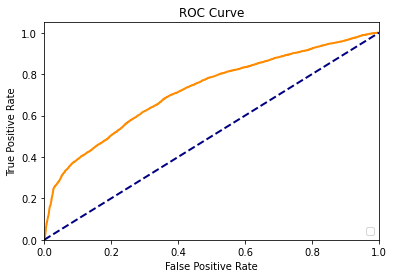

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Precision Recall
prec, rec, thresh = precision_recall_curve(y_test, lgr_risks)
prec2, rec2, thresh2 = precision_recall_curve(y_test, rf_risks)

Text(0.5, 1.0, 'Precision Recall curve')

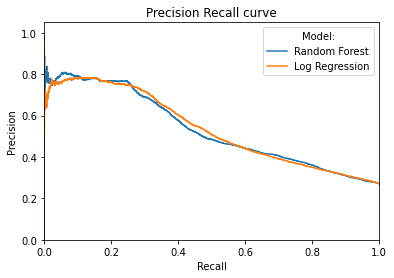

In [ ]:
# Precision recall curve
plt.figure()
plt.step(rec2, prec2, where='post', label='Random Forest')
plt.step(rec, prec, where='post', label='Log Regression')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(title='Model:')
plt.title('Precision Recall curve')

We see the RF model has better behavior with respect to precision at the top of the graph. 

## Other model info

### Plot decision tree

In [ ]:
from sklearn import tree
from sklearn.utils.validation import check_is_fitted

In [ ]:
check_is_fitted(clf[1])

[Text(188.14701368343196, 207.55636363636364, 'X[227] <= 0.5\ngini = 0.396\nsamples = 61510\nvalue = [44777, 16733]'),
 Text(113.51270802514794, 187.7890909090909, 'X[90] <= -0.624\ngini = 0.346\nsamples = 55409\nvalue = [43085, 12324]'),
 Text(56.607387204142015, 168.0218181818182, 'X[164] <= 0.5\ngini = 0.479\nsamples = 10518\nvalue = [6330, 4188]'),
 Text(33.97217085798817, 148.25454545454545, 'X[131] <= 0.5\ngini = 0.497\nsamples = 6432\nvalue = [3449, 2983]'),
 Text(21.451220414201185, 128.48727272727274, 'X[177] <= 0.5\ngini = 0.494\nsamples = 6122\nvalue = [3393, 2729]'),
 Text(13.124556213017753, 108.72, 'X[145] <= 0.5\ngini = 0.499\nsamples = 5170\nvalue = [2683, 2487]'),
 Text(6.809911242603551, 88.95272727272729, 'X[255] <= 0.5\ngini = 0.498\nsamples = 4715\nvalue = [2512, 2203]'),
 Text(3.7144970414201186, 69.18545454545455, 'X[254] <= 0.5\ngini = 0.499\nsamples = 4125\nvalue = [2138, 1987]'),
 Text(1.9810650887573966, 49.418181818181836, 'X[175] <= 0.5\ngini = 0.5\nsamples

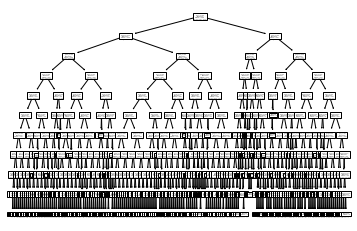

In [ ]:
tree.plot_tree(clf[1])

[Back to top](#bt)
#Feature Importance <a name="f1"></a>

In [ ]:
def get_column_names_from_ColumnTransformer(column_transformer):    
    col_name = []

    for transformer_in_columns in column_transformer.transformers_: #_[:-1] the last transformer is ColumnTransformer's 'remainder'
        #print('\n\ntransformer: ', transformer_in_columns[0])
        
        raw_col_name = list(transformer_in_columns[2])
        
        if isinstance(transformer_in_columns[1], Pipeline): 
            # if pipeline, get the last transformer
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
            
        try:
          if isinstance(transformer, OneHotEncoder):
            if isinstance(transformer_in_columns[1].named_steps['imputer'],SimpleImputer) and transformer_in_columns[1].named_steps['imputer'].add_indicator:
                missing_indicator_indices = transformer_in_columns[1].named_steps['imputer'].indicator_.features_
                missing_indicators = [raw_col_name[idx] + '_missing_flag' for idx in missing_indicator_indices]
                all_col_names = raw_col_name + missing_indicators
                names = list(transformer.get_feature_names(all_col_names))
                    
            else:
                names = list(transformer.get_feature_names(raw_col_name))
            
          elif isinstance(transformer, SimpleImputer) and transformer.add_indicator:
            missing_indicator_indices = transformer.indicator_.features_
            missing_indicators = [raw_col_name[idx] + '_missing_flag' for idx in missing_indicator_indices]

            names = raw_col_name + missing_indicators
            
          else:
            names = list(transformer.get_feature_names())
          
        except AttributeError as error:
          names = raw_col_name
        
        #print(names)    
        
        col_name.extend(names)
            
    return col_name

In [ ]:
feature_names = get_column_names_from_ColumnTransformer(tree_preprocessor)

Text(0.5, 0, 'Feature Importance Score')

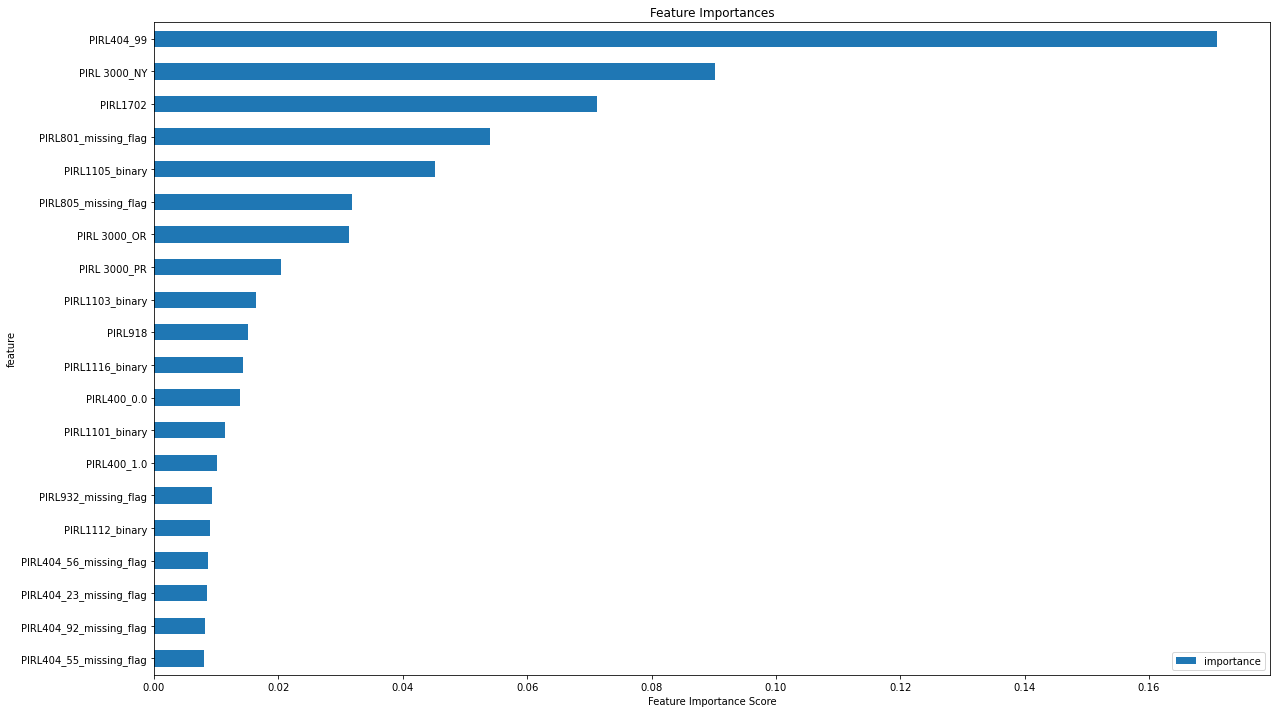

In [ ]:
import matplotlib.pyplot as plt

fi = pd.DataFrame({'importance': clf_rf.named_steps['classifier'].feature_importances_})
fi['feature'] = feature_names
fi.sort_values(by='importance', ascending=False, inplace=True)
fi = fi.iloc[:20]
fi.sort_values(by='importance', inplace=True)
fi = fi.set_index('feature', drop=True)
fi.plot.barh(title="Feature Importances",
                   figsize=(20, 12))  # Wider figure
plt.xlabel('Feature Importance Score')

### Feature importance insights:

The top feature, **404_99**, is Industry Code of Employment 1st Quarter Prior to Participation, where "99" means the industry was unknown or left blank. This likely suggests the individual was unemployed on entering as this would not apply to employed people. 

Further evidence is that **400_0** appears, and 0 here refers to unemployed at entry. 

**1702** is wages prior to entry. This makes sense - those with high previous wages are likely skilled and so more able to gain employment, while 0 or low wages can be a strong inidcator or low skills. 

**1105** is whether they were referred to employment. 

**1103** is that they've received workforce information services.

[Back to top](#bt)
#Regression Analysis on States <a name="rs"></a>
We find that Wyoming, Iowa and Hawaii have the largest positive coefficents for regaining employment. Although there may be confounding variables we could not control for in this regression, we have included some of the most prominent indicators and therefore conclude that it may be worth investigating these states for best practices. 

In [ ]:
# control for top important features, plus demographics: age, sex and race 
lrdf = dfo[['PIRL1105_binary', 'PIRL1103_binary', 'PIRL1116_binary', 'PIRL1702','PIRL 3056','PIRL404_99', 'PIRL408', 'PIRL201', 'PIRL 3023', 'PIRL 3000', 'PIRL1602']]

from statsmodels.api import OLS
ly = lrdf.iloc[:,10]
lX = lrdf.iloc[:,0:10]
lrpreprocessor = ColumnTransformer(
    transformers=[
        ('job', basic_impute_transformer,['PIRL404_99']),
        ('bin', basic_impute_transformer,['PIRL1105_binary', 'PIRL1103_binary', 'PIRL1116_binary']),
        ('num', med_impute_transformer, num_features),
        ('obj', obj_transformer, obj_features),
        ('cat', cat_transformer, ['PIRL 3023', 'PIRL201', 'PIRL408'])],
        remainder="passthrough")
plX = lrpreprocessor.fit_transform(lX)
xdf = pd.DataFrame(plX, columns=get_column_names_from_ColumnTransformer(lrpreprocessor))
ydf = pd.DataFrame(ly, columns=['Y'])
OLS(ly, plX).fit().summary(xname=get_column_names_from_ColumnTransformer(lrpreprocessor))



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PIRL1602   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     988.4
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        01:14:12   Log-Likelihood:            -2.4326e+05
No. Observations:              459034   AIC:                         4.867e+05
Df Residuals:                  458955   BIC:                         4.875e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
PIRL404_99                    -0.5971      0.003   -215.630      0.000      -0.603      -0.592
PIRL404_99_missing_flag       -0.0840      0.002    -41.883      0.000      -0.088      -0.080
PIRL1105_binary                0.0345      0.002     19.371      0.000       0.031       0.038
PIRL1103_binary               -0.0071      0.002     -3.688      0.000      -0.011      -0.003
PIRL1116_binary               -0.0116      0.002     -5.879      0.000      -0.015      -0.008
PIRL1702                    1.387e-06   4.39e-08     31.635      0.000     1.3e-06    1.47e-06
PIRL 3056                     -0.0018   5.82e-05    -30.153      0.000      -0.002      -0.002
PIRL1702_missing_flag         -0.3357      0.072     -4.675      0.000      -0.476      -0.195
PIRL 3000_AK                  -0.0171      0.025     -0.674      0.501      -0.067       0.033
PIRL 3000_AL                   0.0361      0.014      2.660      0.008       0.010       0.063
PIRL 3000_AR                   0.0597      0.021      2.777      0.005       0.018       0.102
PIRL 3000_AZ                  -0.0284      0.012     -2.274      0.023      -0.053      -0.004
PIRL 3000_CA                  -0.0607      0.006    -11.025      0.000      -0.071      -0.050
PIRL 3000_CO                  -0.0134      0.011     -1.247      0.212      -0.035       0.008
PIRL 3000_CT                  -0.0060      0.010     -0.600      0.549      -0.025       0.014
PIRL 3000_DC                   0.1811      0.023      8.042      0.000       0.137       0.225
PIRL 3000_DE                  -0.0055      0.020     -0.269      0.788      -0.045       0.034
PIRL 3000_FL                   0.1170      0.008     14.771      0.000       0.102       0.133
PIRL 3000_GA                   0.0363      0.010      3.611      0.000       0.017       0.056
PIRL 3000_GU                  -0.4418      0.218     -2.028      0.043      -0.869      -0.015
PIRL 3000_HI                   0.3449      0.035      9.854      0.000       0.276       0.413
PIRL 3000_IA                   0.3629      0.073      4.960      0.000       0.220       0.506
PIRL 3000_ID                   0.0250      0.022      1.149      0.251      -0.018       0.068
PIRL 3000_IL                  -0.0100      0.007     -1.490      0.136      -0.023       0.003
PIRL 3000_IN                  -0.0105      0.007     -1.464      0.143      -0.025       0.004
PIRL 3000_KS                   0.0359      0.016      2.235      0.025       0.004       0.067
PIRL 3000_KY                  -0.0878      0.006    -15.828      0.000      -0.099      -0.077
PIRL 3000_LA                  -0.1628      0.006    -25.584      0.000      -0.175      -0.150
PIRL 3000_MA                   0.0013      0.009      0.150      0.881      -0.016       0.018
PIRL 3000_MD                   0.0189      

[Back to top](#bt)
#Fairness audit proof of concept <a name="fa"></a>

The ML tool is meant to help administrators better understand which entering participants are unlikely to attain employment after program exit and consider ways to improve their odds of success. Federally funded programs, however, have strict rules regarding the kind of resources that may be allocated to different groups. 

Many "fairness" metrics exist in the ML literature and tools can be designed to ensure equitable treatment (however equity is defined). In cases in which limited resources are to be distributed, such as when considering new or better ways to intervene on high-risk individuals in the program, "equal opportunity" is often considered. Equal opportunity strives for a kind of group fairness in predicted outcomes. For example, if we are concerned with ensuring fairness in how the model treats males versus females, the classifier should give similar results for applicants of both genders with actual positive labels (i.e., they fail to attain employment).

In [ ]:
rf_risk_df = pd.DataFrame(index=X_test.index,
                            data=rf_risks,
                            columns=["Risk"]).join(y_test)

In [ ]:
rf_risk_df.rename(columns={'PIRL1602':'Label'}, inplace=True)

In [ ]:
rf_risk_df.head()

,Risk,Label
PIRL100,,
dccede5AU94c,0.422904,0
Saf9DAaD4d0U,0.565734,1
D5D5dFbDDAeA,0.316407,0
dS4caDSD0U44,0.181058,0
aLfcAFaDLA4a,0.147542,0


In [ ]:
fairness = rf_risk_df.join(df[['PIRL201']]);

In [ ]:
male = fairness.groupby(['PIRL201']).get_group(1)
female = fairness.groupby(['PIRL201']).get_group(2)

In [ ]:
male.shape

(15318, 3)

In [ ]:
female.shape

(14979, 3)

In [ ]:
from sklearn.metrics import roc_curve
m_fpr, m_tpr, m_ths = roc_curve(male['Label'], male['Risk'])
f_fpr, f_tpr, f_ths = roc_curve(female['Label'], female['Risk'])

No handles with labels found to put in legend.


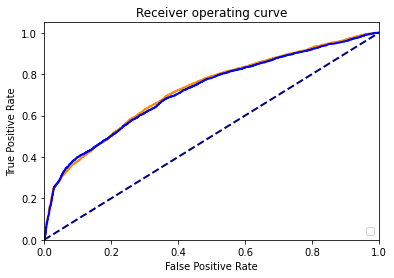

In [ ]:
plt.figure()
lw = 2
plt.plot(m_fpr, m_tpr, color='darkorange',
         lw=lw)
plt.plot(f_fpr, f_tpr, color='blue',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating curve')
plt.legend(loc="lower right")
plt.show()

Similar curves suggest fairness by gender. 

[Back to top](#bt)
#Value Add <a name="vr"></a>

The primary goal of any Machine Learning tool is to provide valuable, actionable insights. There is sepcific *statutory language* in the WIOA program's Final Rule that we highlight here, as they are relevant to our claims of adding value. The program:

- _"...strengthens and improves our nation’s public workforce system **and increases economic opportunities for individuals...with significant barriers to employment**_
- *...supports **innovative strategies to improve** coordination among the six core programs*
- "...ensure[s] that the public workforce system operates as a comprehensive, integrated, and streamlined system to provide pathways to prosperity and continuously improve the quality and performance of its services to job seekers and to employers."

Our tool can condition success on important features like which state and which program the participant was in to help uncover states that perform more or less well when assisting individuals in cohorts that are of greatest need (e.g., older individuals, ex-offenders, and other groups that face significant barriers). 

Evaluation, discovery and coordination can be enhanced when the tool we have constructed is refined, tested, and deployed. Many of the gains noted above, however, are qualitiative. Further, taking up such a model is costly in terms of the time and expertise that must be devoted to it. 

## Estimating our tool's value add

The WIOA program already has its own performance metrics that well-defined and reported. We therefore use these figures and what we have found in the data to make a **quantitative** case for how even the initial deployment of our model can pay for itself as well as advance the programs goals. 

In Program Year 2018, nearly 500,000 individuals were served under the dislocated worker program.
- Career Services: 412,208

    - Cost per participant: $1,008

- Training Services: 68,076

    - Cost per participant: $2,677

## Value add research

Below we conduct a simple value add analysis by quantifying the net total wage change a successful versus unsuccessful participant experiences and the expected unemployment insurance cost the unsuccessful participant is expected to cost the state government. 

We find a conservative estimation results in a net ~10,000 loss, 2/3 of which come from lost wages to the inidividual, and 1/3 of which comes in the form of direct support costs to the unemployed individual. If the participant re-enrolls or is continued to be served by WIOA, additional program resources will be spent. All of this, we believe, means there is strong justification for spending more time and effort on the participant during initial enrollment. Converting these individuals to "employed" returns great value. 

## Wages

Calculations:

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('WIOA_clean_v2.csv', index_col=0)

In [ ]:
df.head()

,PIRL201,PIRL202,PIRL300,PIRL400,PIRL402,PIRL407,PIRL408,PIRL409,PIRL600,PIRL602,...,PIRL404_53,PIRL404_31,PIRL404_45,PIRL404_71,PIRL404_55,PIRL404_49,PIRL404_52,PIRL404_33,PIRL404_32,PIRL404_51
PIRL100,,,,,,,,,,,,,,,,,,,,,
054A4Aa0cUca,1.0,0.0,1.0,0.0,0.0,12.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
055aAD9eLAS4,2.0,0.0,0.0,1.0,1.0,11.0,0.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09ULAA0DDeUL,1.0,0.0,0.0,0.0,0.0,12.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09a9U0A0A5Ub,1.0,0.0,0.0,0.0,1.0,12.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0AbSU5fb5cd5,1.0,0.0,0.0,0.0,0.0,12.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
wage = df[['PIRL1602','PIRL1702','PIRL1704']]

In [ ]:
wage['wage_change'] = wage.loc[:,'PIRL1704']-wage.loc[:,'PIRL1702']

<ipython-input-5-63ccc5a6980c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wage['wage_change'] = wage.loc[:,'PIRL1704']-wage.loc[:,'PIRL1702']


In [ ]:
# Looks like a lot of outliers! How are people making 250k in the first quarter before entry?!
wage.iloc[:,1].describe()

count    443427.000000
mean       9766.455321
std       15116.583348
min           0.000000
25%        3017.980000
50%        7018.910000
75%       12082.000000
max      997597.000000
Name: PIRL1702, dtype: float64

In [ ]:
# Look by state, are the outliers in one state program? Sense check.
df.loc[wage.iloc[:,1].sort_values(ascending=False)[:1400].index].groupby(
    ['PIRL 3000']).agg({
    'PIRL201':'count','PIRL1702':'mean', 'PIRL1704':'mean'})[:20]

,PIRL201,PIRL1702,PIRL1704
PIRL 3000,,,
AZ,1,97659.310000,23958.350000
CA,62,167757.374355,27042.681452
CT,4,151795.487500,32610.752500
FL,2,140986.000000,78516.000000
IN,2,116639.545000,47392.845000
KS,1,98665.270000,9570.960000
KY,3,248266.446667,22346.053333
LA,3,260923.666667,0.000000
MA,11,171409.195455,34167.860909


In [ ]:
# Look at averages, even with outliers
wage.groupby('PIRL1602').agg({'PIRL1702':'mean', 'PIRL1704':'mean','wage_change':'mean'}).round()

,PIRL1702,PIRL1704,wage_change
PIRL1602,,,
0,9141.0,5.0,-9136.0
1,9996.0,9355.0,-573.0


### Overall this makes sense

People do NOT typically find jobs that pay MORE than a previous job that has been displaced. The folks making a ton of money in quarter before entry are likely very few and I suspect problems, so a trimmed mean is probably more realistic guage of average wages replaced by those who become employed upon exit versus those that fail to do so. 

In [ ]:
from scipy import stats

In [ ]:
unemp = wage[wage['PIRL1602']==0]
emp = wage[wage['PIRL1602']==1]

In [ ]:
stats.trim_mean(unemp.loc[:,'PIRL1702'], 0.1)

7300.203712597751

In [ ]:
stats.trim_mean(emp.loc[:,'PIRL1702'], 0.1)

8491.229871355989

In [ ]:
stats.trim_mean(unemp.loc[:,'PIRL1704'], 0.1)

0.0

In [ ]:
stats.trim_mean(emp.loc[:,'PIRL1704'], 0.1)

7907.352068308999

In [ ]:
print("Wage change, unemployed")
(0 - 7300)

Wage change, unemployed


-7300

In [ ]:
print("Wage change, employed")
(7907 - 8491)

Wage change, employed


-584

In [ ]:
-584-(-7300)

6716

## Average difference in wage replacement:  $6,716

We find that a resonable estimate of the average wage gain made by a successful versus unsuccessful participant is \$6,716. Those that complete the program succesfully and become employed still report an average wage slightly below that of what they earned in their last quarters prior to program entry (i.e., last reported quarterly wage before becoming dislocated). But the loss is small, and the total wage gain is substantial when we consider the unemployed have not replaced their wages. This latter fact is why we now also consider the average cost to the government to support a worker that has lost their wages. 

## Unemployment Insurance (UI)
Calculations:

In [ ]:
# Find top states that are included in the program. These will become our weights for determining average
# UI cost
top_state_share = round(df.groupby('PIRL 3000').size()/len(df)*100,2).sort_values(ascending=False)[:9]
top_state_share

PIRL 3000
NY    39.22
OR    26.19
CA     4.78
KY     4.07
IA     2.81
LA     2.05
PA     1.90
MO     1.77
IL     1.59
dtype: float64

In [ ]:
# https://oui.doleta.gov/unemploy/data_summary/DataSum.asp
ui = pd.read_csv('UI2018_summary.csv')
ui.head()

,State,Year,Quarter,Civilian Labor Force(000),Covered Employment(000),Subject Employers(000),Unemployment_rate,Unemployment Rank,Total Unemployed(000),Insured Unemployed Regular Programs(000),...,Average High Cost Multiple Rank,Extended Benefits(000),EB First Payments,EB Weeks Claimed,EB Exhaustions,Title XII Loan Balance(000),Loan Per Cov. Employee,Loan as % of Total Wages,Non-Title XII Loan Balance(000),Begin Date Non-Title XII Loan
0,CA,2018,1,"19,220","16,838","1,391",4.6,19.0,884,381.5,...,52.0,8,1,18,1,$0,$0.00,0,$0,N.A.
1,CA,2018,2,"19,230","17,122","1,403",4.1,14.0,782,346.16,...,52.0,0.6,0,0,0,$0,$0.00,0,$0,N.A.
2,CA,2018,3,"19,320","17,121","1,420",4.3,12.0,827,317.9,...,52.0,3,1,13,1,$0,$0.00,0,$0,N.A.
3,CA,2018,4,"19,354","17,359","1,429",4.1,12.0,787,311.53,...,52.0,1,0,0,0,$0,$0.00,0,$0,N.A.
4,IA,2018,1,"1,671","1,502",79,3.3,46.0,56,31.71,...,11.0,0,0,0,0,$0,$0.00,0,$0,N.A.


In [ ]:
ui_benefit = ui[['State','Quarter','Total Unemployed(000)','Average Weekly Benefit','Total Weeks Claimed','Average Duration Past 12 Months','Average Weekly Wage']]

In [ ]:
def to_num(x):
    x = x.replace(',', '').replace('$','')
    x = float(x)
    return x

In [ ]:
ui_benefit.dtypes

State                               object
Quarter                              int64
Total Unemployed(000)               object
Average Weekly Benefit              object
Total Weeks Claimed                 object
Average Duration Past 12 Months    float64
Average Weekly Wage                 object
dtype: object

In [ ]:
cols = [2,3,4,6]
for i in cols:
    col = ui_benefit.columns[i]
    ui_benefit[col]=ui_benefit[col].apply(lambda x: to_num(x))

<ipython-input-24-c9ac6a7dfc8e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ui_benefit[col]=ui_benefit[col].apply(lambda x: to_num(x))


In [ ]:
ui2018 = ui_benefit.groupby('State').agg({'Average Weekly Benefit':'mean',
                                'Average Duration Past 12 Months':'mean',
                                'Average Weekly Wage':'mean'})

In [ ]:
ui2018

,Average Weekly Benefit,Average Duration Past 12 Months,Average Weekly Wage
State,,,
CA,328.9925,17.750,1294.75
IA,395.4875,13.075,898.75
IL,379.7800,16.950,1134.50
KY,341.0875,18.675,873.75
LA,212.4950,16.200,904.50
MO,264.9600,12.225,923.00
NY,344.2500,16.975,1388.00
OR,397.3600,15.400,999.75
PA,378.8775,15.650,1052.25


In [ ]:
ui2018['state_share'] = top_state_share

In [ ]:
rest_of_us = 100-ui2018['state_share'].sum()

In [ ]:
ui2018.at['US','state_share'] = rest_of_us

In [ ]:
ui2018

,Average Weekly Benefit,Average Duration Past 12 Months,Average Weekly Wage,state_share
State,,,,
CA,328.9925,17.750,1294.75,4.78
IA,395.4875,13.075,898.75,2.81
IL,379.7800,16.950,1134.50,1.59
KY,341.0875,18.675,873.75,4.07
LA,212.4950,16.200,904.50,2.05
MO,264.9600,12.225,923.00,1.77
NY,344.2500,16.975,1388.00,39.22
OR,397.3600,15.400,999.75,26.19
PA,378.8775,15.650,1052.25,1.90


In [ ]:
avg_ben = sum(ui2018['Average Weekly Benefit']*(ui2018['state_share']/100))
avg_ben

357.72550850000005

In [ ]:
avg_len = sum(ui2018['Average Duration Past 12 Months']*(ui2018['state_share']/100))
avg_len

16.1876025

In [ ]:
# Average wage underpinning the UI weekly claim. We need to make this proportional to the wage the gov't would replace
avg_wage = sum(ui2018['Average Weekly Wage']*(ui2018['state_share']/100))
avg_wage

1169.817425

In [ ]:
# trimmed average for all enrollees quarter before entry
stats.trim_mean(wage.loc[:,'PIRL1702'], 0.1)

8164.37524823815

In [ ]:
# Average weekly wage before entry (average wage before entry divided by 12 weeks in a quarter)
8165/12

680.4166666666666

In [ ]:
# Proprtion of participant's expected average weekly wage to the avg_wage of the UI data
680/avg_wage

0.581287289339189

In [ ]:
# The average expected benefit given this ratio
(680/avg_wage)*avg_ben

207.94129116344806

In [ ]:
((680/avg_wage)*avg_ben)*avg_len

3366.07096469066

## Average expected UI payment to support participants that do not find work: $3,366

If those who fail to become employed take the average UI benefit, propoprtional to pre-UI average weekly earnings, and remain on that program for the average duration, then that individual will receive ~$3,366 of wage support

##  Recap: 

A direct UI support loss to government of 3,300 and a direct wage loss to individual of 6,700 means even the most conservative estimate of benefits and costs to the government and an individual for program failure is ~$10,000. 

If the participant is continued to be served by WIOA, the loss is extended. We lacked resources to do a full dynamic scoring, but if we added average SNAP benfits and other likely supports, as well as calculated the expected payroll and local and state taxes the employed worker would contribute, then the value add could be much greater. 